1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

In [2]:
#посмотрим на датасет
df = pd.read_csv('air_data.csv', sep=';')
df.head(10)

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
5,2021-11-29 00:00:00,2022-01-14 00:00:00,AD,250,MOW,DUS,МВЛ,NaN,ONLINE
6,2021-12-03 00:00:00,2022-01-06 00:00:00,AD,200,MOW,PEE,ВВЛ,FFP,ONLINE
7,2021-11-28 00:00:00,2022-01-07 00:00:00,CHD,70,MOW,AER,ВВЛ,FFP,ONLINE
8,2021-12-02 00:00:00,2022-01-10 00:00:00,CHD,490,MOW,NJC,ВВЛ,FFP,ONLINE
9,2021-11-25 00:00:00,2022-01-03 00:00:00,AD,280,MOW,KUF,ВВЛ,NaN,ONLINE


## 2. Предобработка данных

In [3]:
# преобразуем название заголовков
df = df.rename(columns={'ISSUE_DATE': 'Issue_Date', 'FLIGHT_DATE_LOC':'Flight_Date_Loc', 'PAX_TYPE':'Pax_Type', 'REVENUE_AMOUNT':'Revenue_Amount', 'ORIG_CITY_CODE':'Orig_City_Code', 'DEST_CITY_CODE':'Dest_City_Code', 'ROUTE_FLIGHT_TYPE':'Route_Flight_Type', 'FFP_FLAG':'FFP_Flag', 'SALE_TYPE':'Sale_Type'})

In [4]:
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [5]:
# посмотрим на типы данных
df.info()
# первые два столбца лучше преобразовать во время

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Issue_Date         50000 non-null  object
 1   Flight_Date_Loc    50000 non-null  object
 2   Pax_Type           50000 non-null  object
 3   Revenue_Amount     50000 non-null  int64 
 4   Orig_City_Code     49998 non-null  object
 5   Dest_City_Code     49999 non-null  object
 6   Route_Flight_Type  50000 non-null  object
 7   FFP_Flag           19398 non-null  object
 8   Sale_Type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [6]:
# перобразуем тип данных в тип datetime
df['Issue_Date'] = pd.to_datetime(df['Issue_Date'], format='%Y-%m-%d')
df['Flight_Date_Loc'] = pd.to_datetime(df['Flight_Date_Loc'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_Date         50000 non-null  datetime64[ns]
 1   Flight_Date_Loc    50000 non-null  datetime64[ns]
 2   Pax_Type           50000 non-null  object        
 3   Revenue_Amount     50000 non-null  int64         
 4   Orig_City_Code     49998 non-null  object        
 5   Dest_City_Code     49999 non-null  object        
 6   Route_Flight_Type  50000 non-null  object        
 7   FFP_Flag           19398 non-null  object        
 8   Sale_Type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


In [7]:
#Посмотрим на наличие пропусков в датасете
df.isna().sum()

Issue_Date               0
Flight_Date_Loc          0
Pax_Type                 0
Revenue_Amount           0
Orig_City_Code           2
Dest_City_Code           1
Route_Flight_Type        0
FFP_Flag             30602
Sale_Type                0
dtype: int64

Видно, что есть пропуски в столбцах с городами назначения и отправления и большое количество пропусков в столбце с наличием программы лояльности.
Более того, все пропуски качественные. В первых двух количесво пропусков по сравнению с объемом всего датасета незначительны, поэтому мы можем просто удалить их

In [8]:
df['FFP_Flag'].unique()
# столбец содержит категориальные данные, которые можно заменить

array([nan, 'FFP'], dtype=object)

In [9]:
df['FFP_Flag'] = df['FFP_Flag'].fillna(0) # заполняем 0 пропуски, что означает отсутствие программы лояльности

In [10]:
# заменим на единицы наблюдения, в которых у пользователей есть программа лояльности
df['FFP_Flag'] = df['FFP_Flag'].replace(['FFP'], 1)
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE


In [11]:
df.isna().sum()

Issue_Date           0
Flight_Date_Loc      0
Pax_Type             0
Revenue_Amount       0
Orig_City_Code       2
Dest_City_Code       1
Route_Flight_Type    0
FFP_Flag             0
Sale_Type            0
dtype: int64

In [12]:
# Теперь можно удалить пропуски в оставшихся столбцах
df = df.dropna().reset_index(drop=True)
df.isna().sum()

Issue_Date           0
Flight_Date_Loc      0
Pax_Type             0
Revenue_Amount       0
Orig_City_Code       0
Dest_City_Code       0
Route_Flight_Type    0
FFP_Flag             0
Sale_Type            0
dtype: int64

In [13]:
# проверка на дубликаты
df.duplicated().sum()

169

In [14]:
# удалим явные дубликаты
df = df.drop_duplicates().reset_index(drop=True)
df
# проверить датасет на наличие скрытых дубликатов не представляется возможным

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE
...,...,...,...,...,...,...,...,...,...
49823,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE
49824,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE
49825,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE
49826,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE


In [15]:
# Исключим нулевые значения по выручке
df = df.drop(np.where(df['Revenue_Amount'] == 0)[0]).reset_index(drop=True)
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE
...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE


### Выводы

1. Обработанный датасет содержит 49828 наблюдений
2. В процессе предобработки данных были удалены дубликаты и 3 наблюдения с незаполненными значениями
3. Датасет был очищен от нулевой выручки для дальнейшего исследования
4. Первые 2 столбца, содержащие информацию о времени покупки билета и времени вылета были преобразованы в формат даты и времени

## 3. Исследовательский анализ данных

## 3.1

Text(0.5, 1.0, 'График динамики выручки')

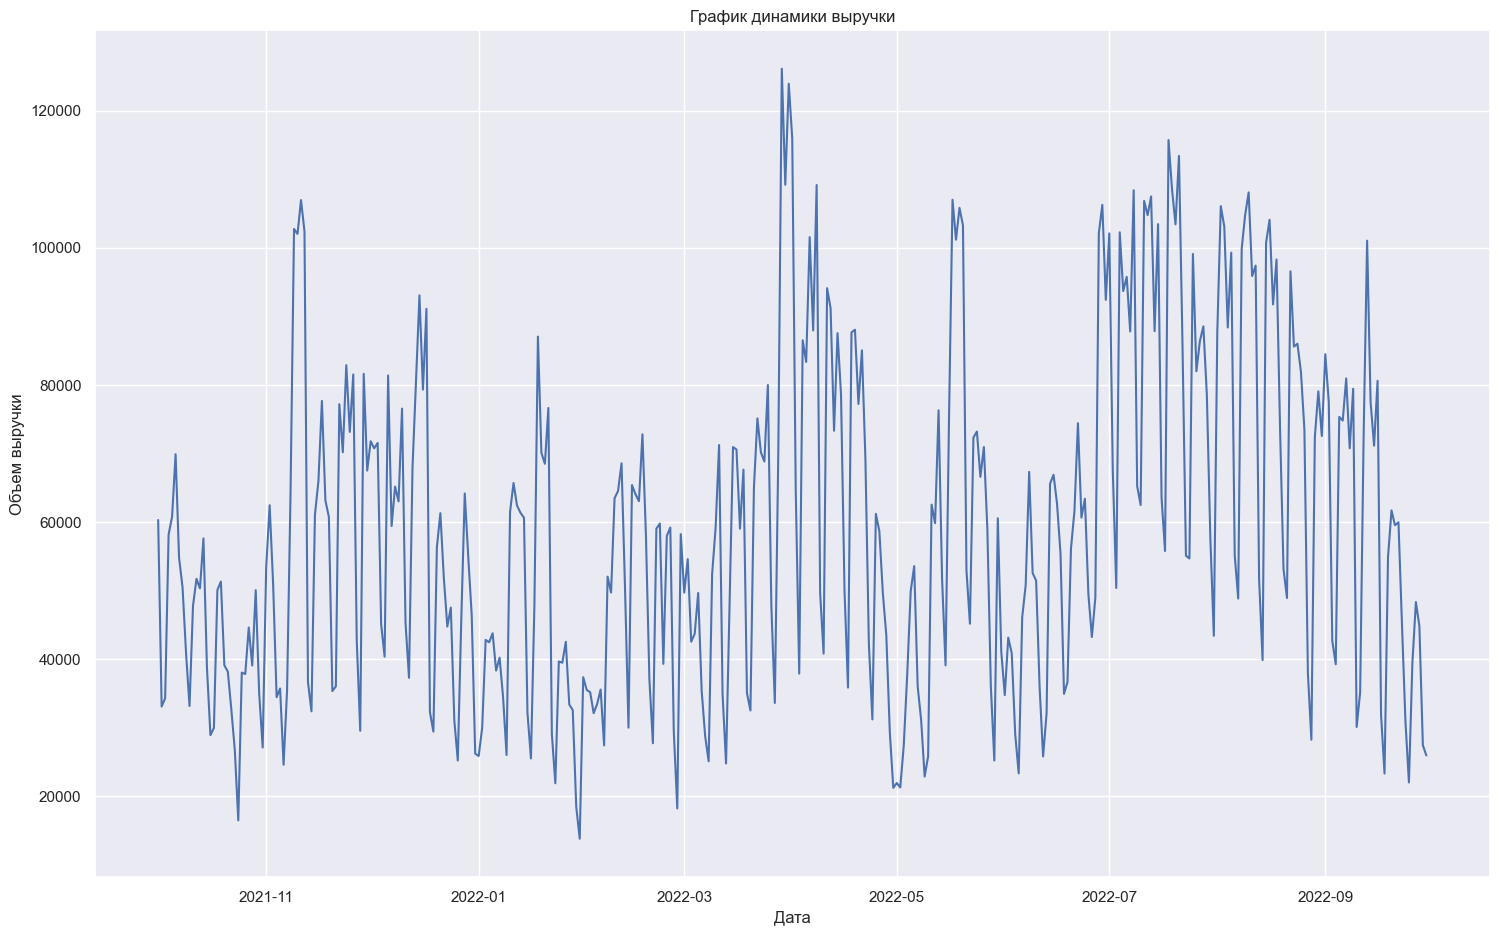

In [16]:
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=df, x='Issue_Date', y='Revenue_Amount', ci=None, estimator='sum')
plt.xlabel('Дата')
plt.ylabel('Объем выручки')
plt.title('График динамики выручки')

### Вывод: <br>
По графику видно, что присутствуют аномальные значения в объемах выручки в некоторые дни. <br>
Проведем детализацию:

Text(0.5, 1.0, 'График динамики выручки с детализацией по наличию программы лояльности')

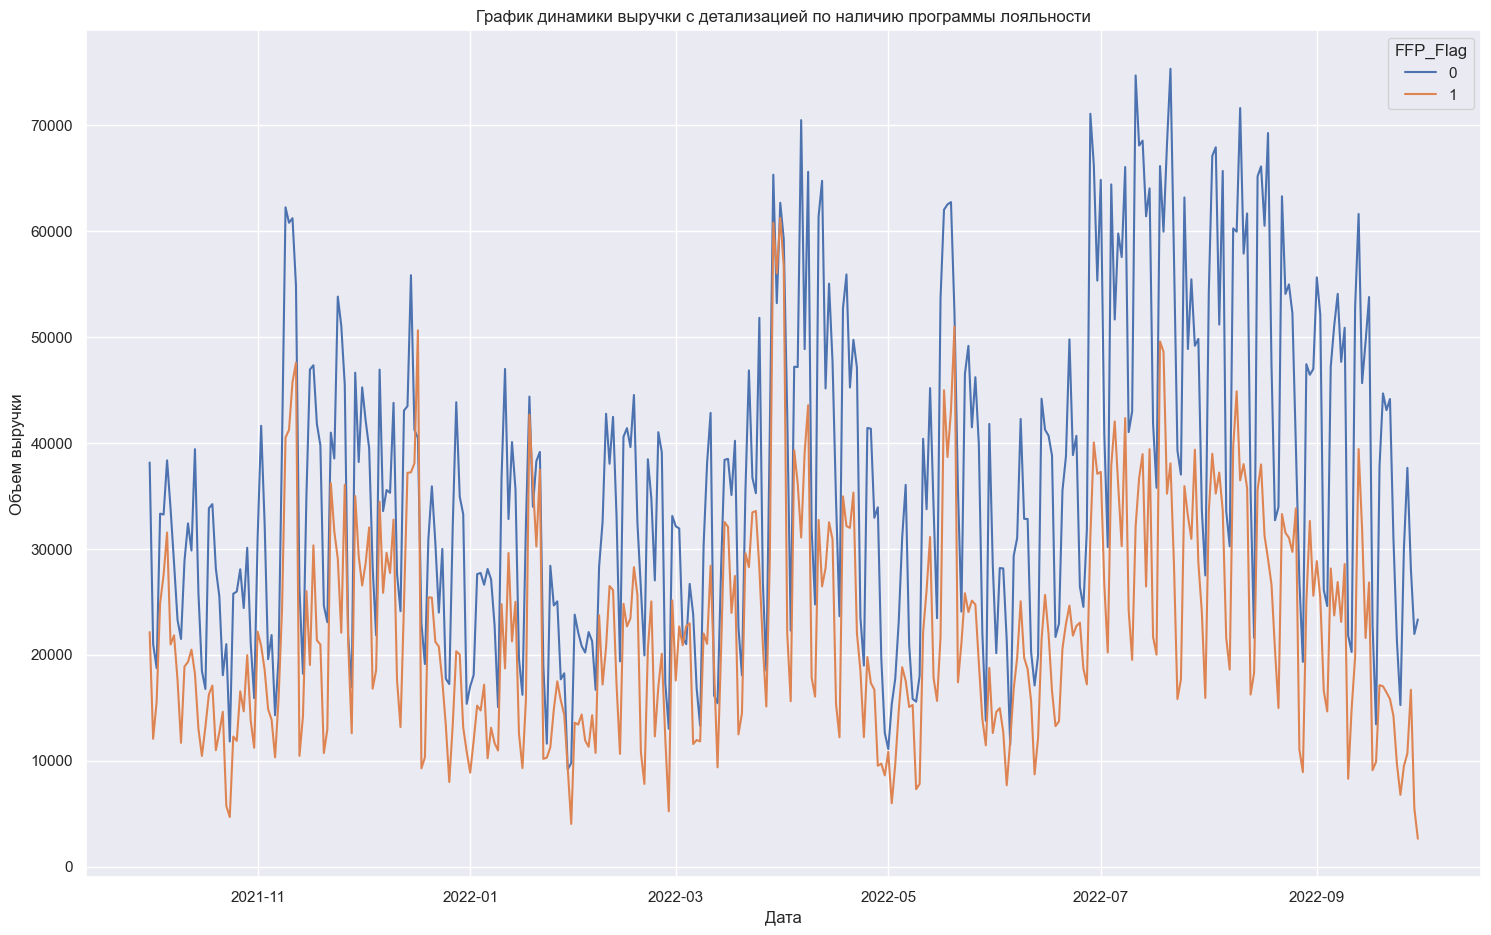

In [17]:
# Детализация по наличию программы лояльности
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=df, x='Issue_Date', y='Revenue_Amount', hue='FFP_Flag', ci=None, estimator='sum')
plt.xlabel('Дата')
plt.ylabel('Объем выручки')
plt.title('График динамики выручки с детализацией по наличию программы лояльности')

Большие объемы выручки были получены от клиентов, которые не имеют программы лояльности, что логично

Text(0.5, 1.0, 'График динамики выручки c детализацией по типу перелета')

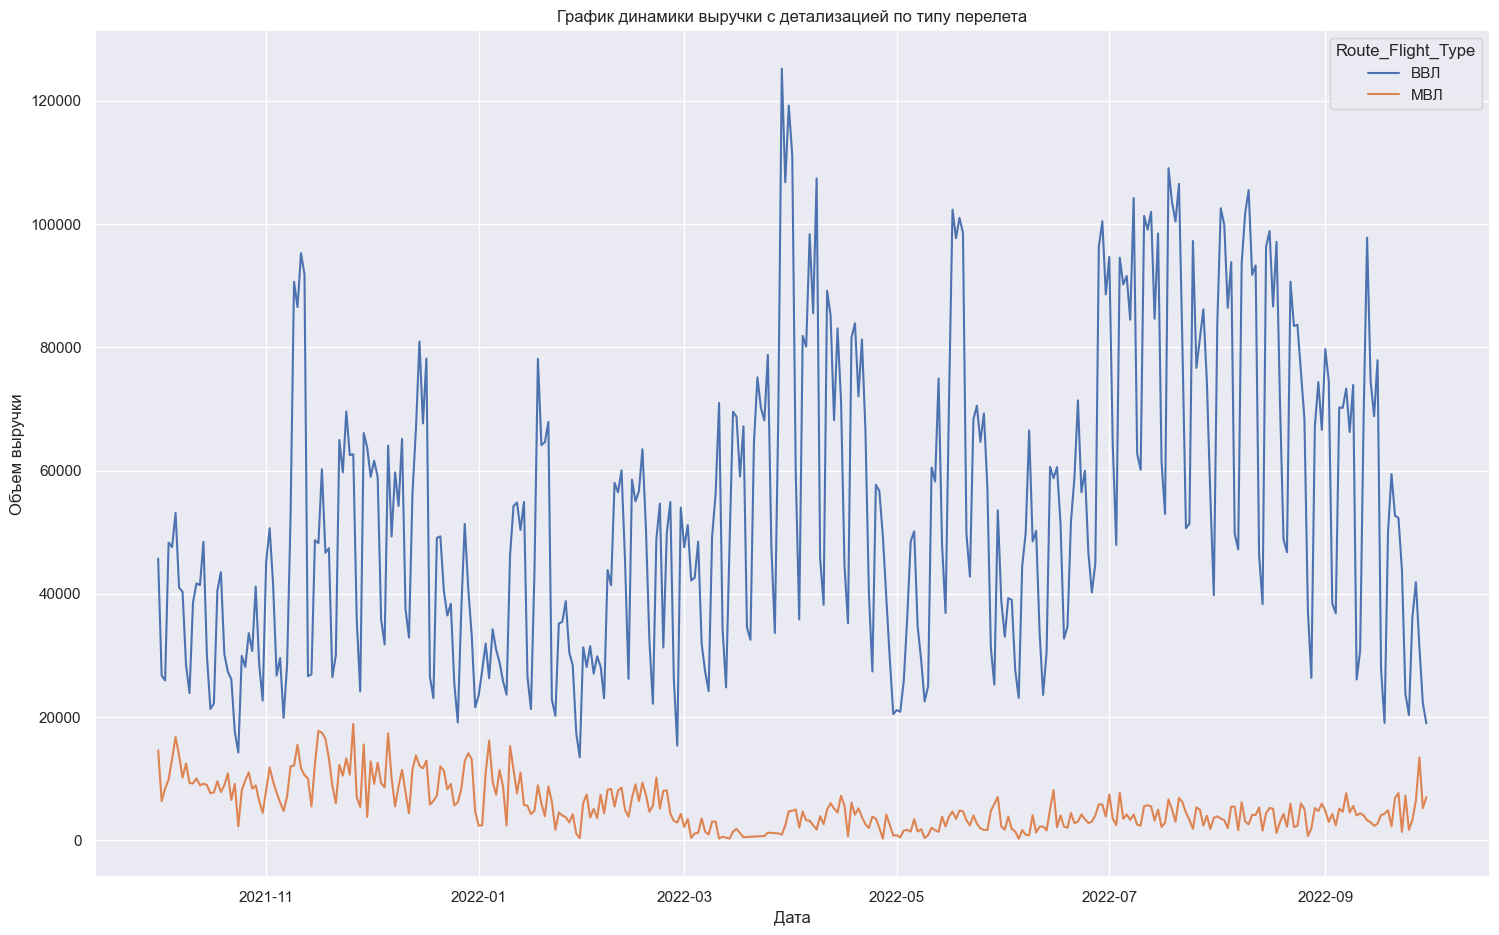

In [18]:
# Детализация по типу перелета
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=df, x='Issue_Date', y='Revenue_Amount', hue='Route_Flight_Type', ci=None, estimator='sum')
plt.xlabel('Дата')
plt.ylabel('Объем выручки')
plt.title('График динамики выручки c детализацией по типу перелета')

Международные рейсы в среднем дали большую выручку, что можно объяснить высокой стоимостью на них, хотя в период с мая 2022 года до середины июля наблюдается падение выручки от международных рейсов

Text(0.5, 1.0, 'График динамики выручки с детализацией по способу покупки')

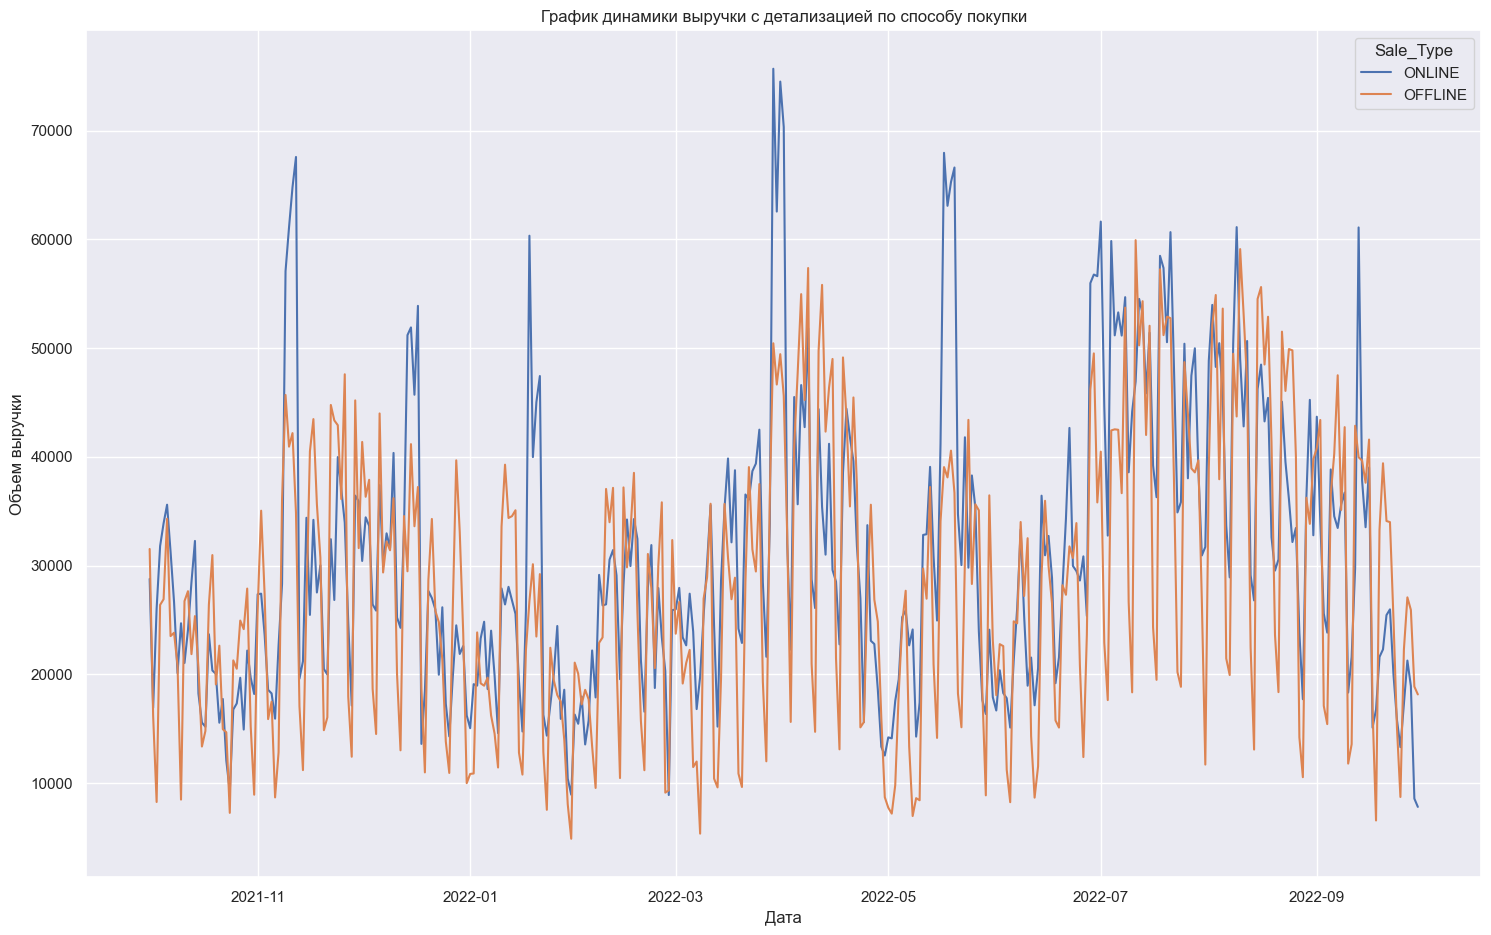

In [19]:
# Детализация по способу покупки
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=df, x='Issue_Date', y='Revenue_Amount', hue='Sale_Type', ci=None, estimator='sum')
plt.xlabel('Дата')
plt.ylabel('Объем выручки')
plt.title('График динамики выручки с детализацией по способу покупки')

Большая часть выручки была получена благодаря онлайн покупкам билетов. Это может быть связано с тем, что люди покупают больше билетов на сайте, чем в аэропортах или кассах

In [20]:
#Отчет по выручке по типам пассажиров
pax_type_table = df.pivot_table(index='Pax_Type', aggfunc = 'sum', values='Revenue_Amount').reset_index()
pax_type_table

,Pax_Type,Revenue_Amount
0,AD,20259210
1,CHD,1333430
2,INF,9730


Text(0.5, 1.0, 'График объема выручки в зависимости от типа пассажира')

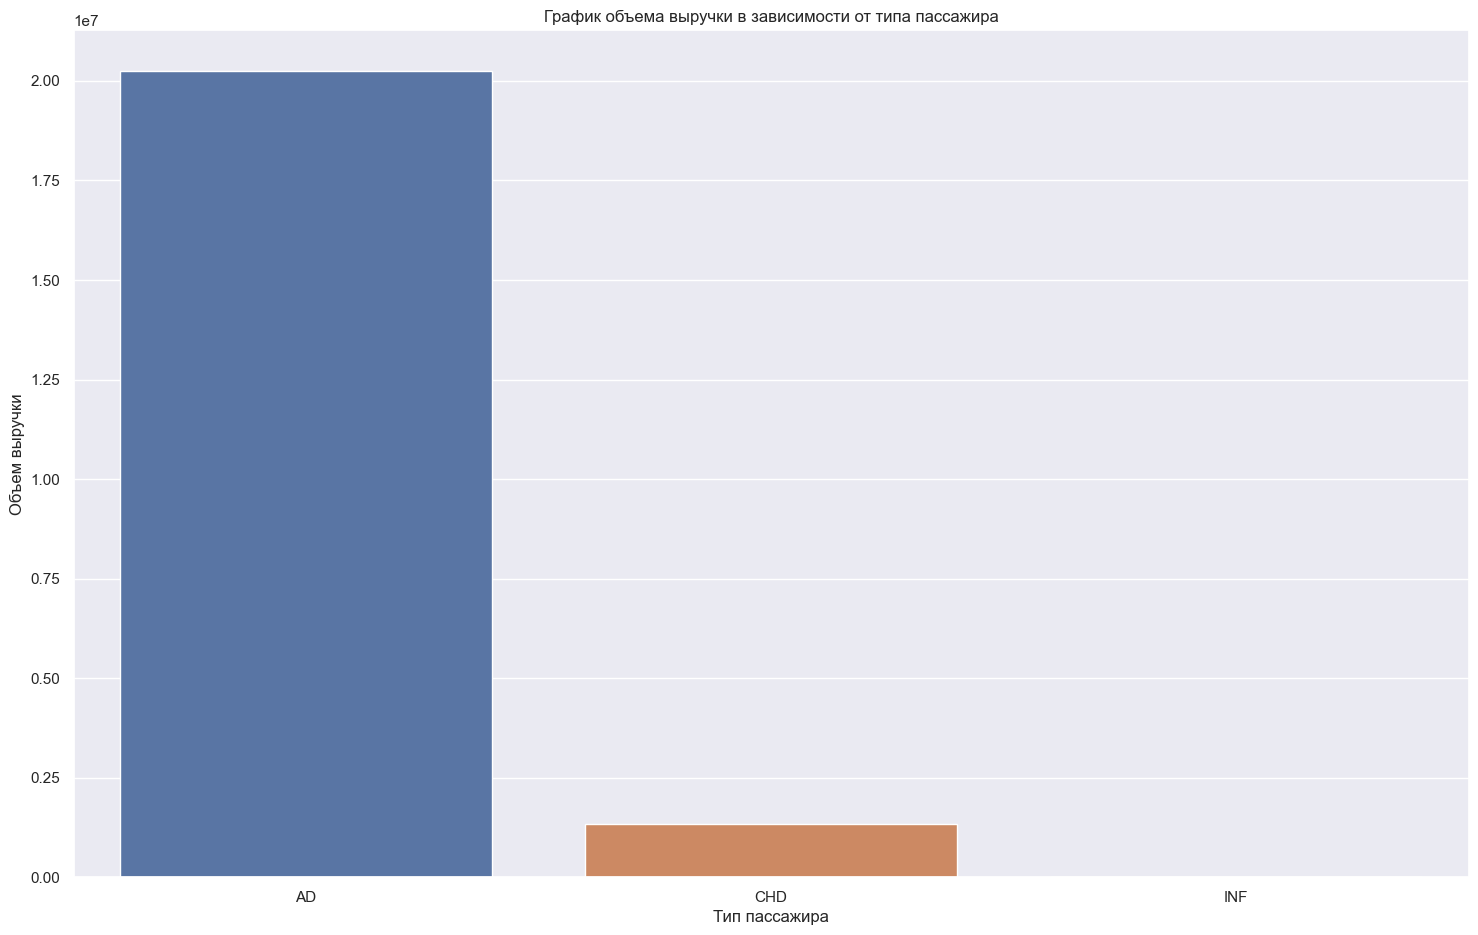

In [21]:
sns.barplot(data=pax_type_table, x='Pax_Type', y='Revenue_Amount')
plt.xlabel('Тип пассажира')
plt.ylabel('Объем выручки')
plt.title('График объема выручки в зависимости от типа пассажира')

In [22]:
# Отчет по выручке по типам перелета
Route_Flight_Type_Table = df.pivot_table(index='Route_Flight_Type', aggfunc='sum', values='Revenue_Amount').reset_index()
Route_Flight_Type_Table

,Route_Flight_Type,Revenue_Amount
0,ВВЛ,19610480
1,МВЛ,1991890


Text(0.5, 1.0, 'График объема выручки в зависимости от типа перелета')

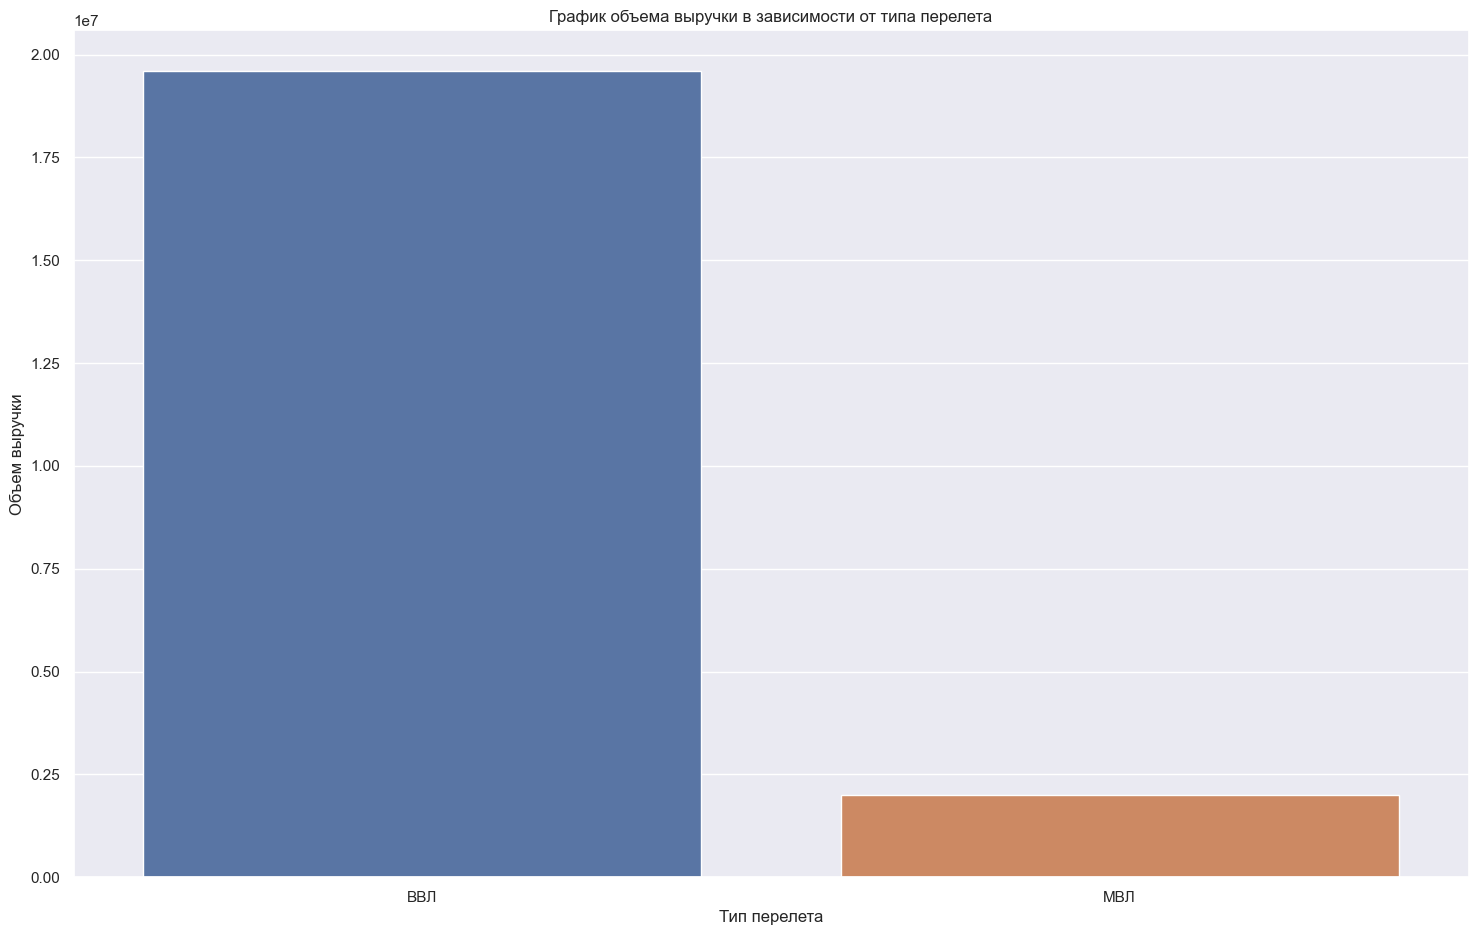

In [23]:
sns.barplot(data=Route_Flight_Type_Table, x='Route_Flight_Type', y='Revenue_Amount')
plt.xlabel('Тип перелета')
plt.ylabel('Объем выручки')
plt.title('График объема выручки в зависимости от типа перелета')

In [24]:
# Отчет по выручке по способу оплаты
Sale_Type_table = df.pivot_table(index='Sale_Type', aggfunc='sum', values='Revenue_Amount').reset_index()
Sale_Type_table

,Sale_Type,Revenue_Amount
0,OFFLINE,10316900
1,ONLINE,11285470


Text(0.5, 1.0, 'График объма выручки в зависимости от способа оплаты билетов')

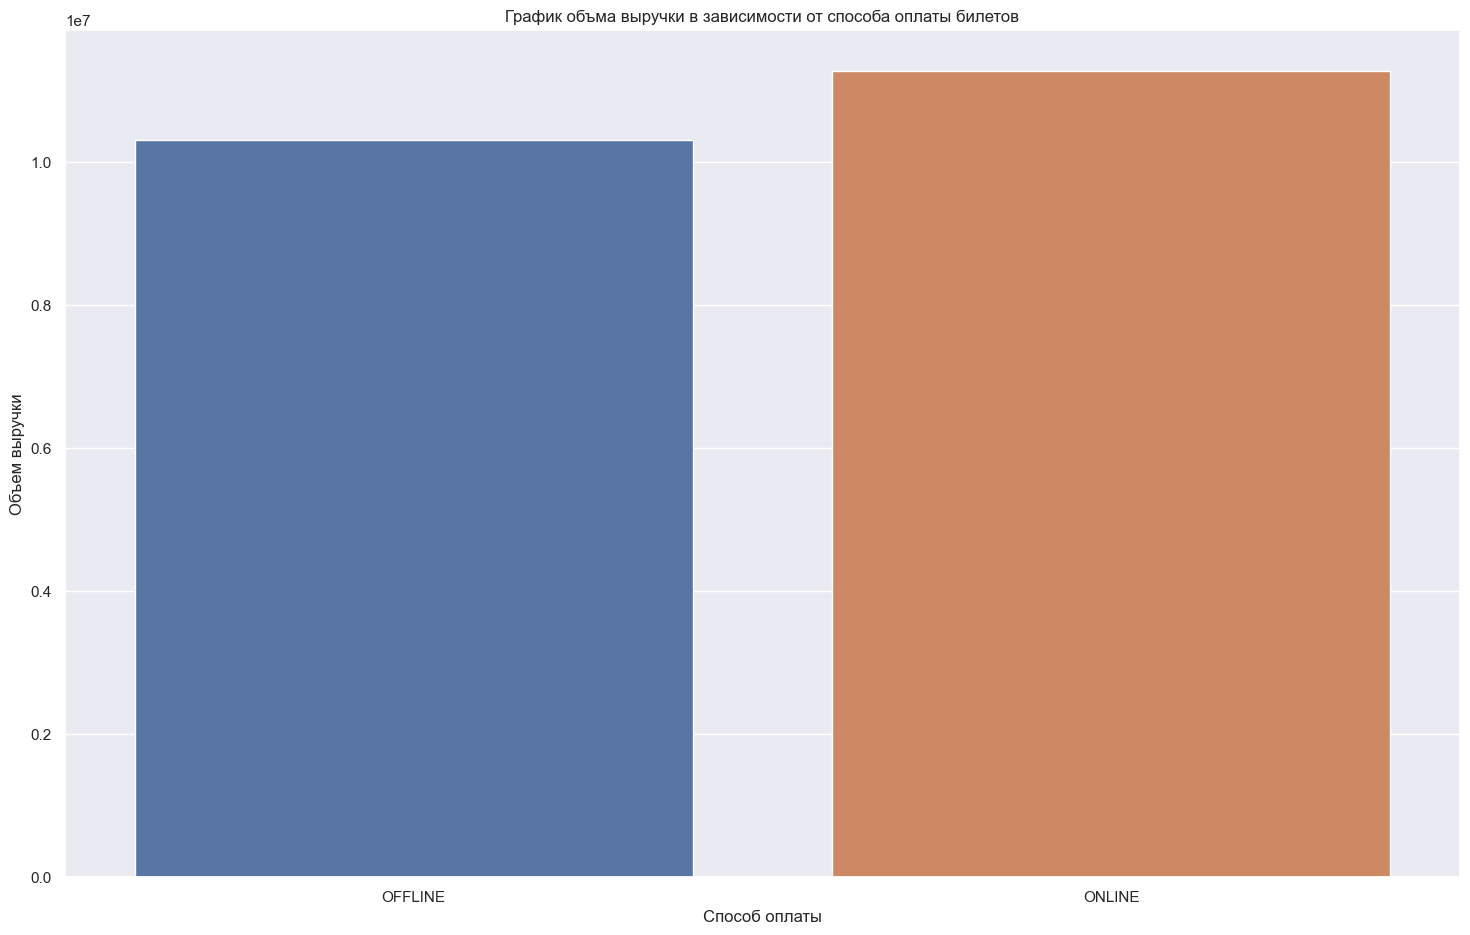

In [25]:
sns.barplot(data=Sale_Type_table, x='Sale_Type', y='Revenue_Amount')
plt.xlabel('Способ оплаты')
plt.ylabel('Объем выручки')
plt.title('График объма выручки в зависимости от способа оплаты билетов')

In [26]:
# Отчет по выручке по наличию программы лояльности
FFP_Flag_table = df.pivot_table(index='FFP_Flag', aggfunc='sum', values='Revenue_Amount').reset_index()
FFP_Flag_table

,FFP_Flag,Revenue_Amount
0,0,13379980
1,1,8222390


Text(0.5, 1.0, 'График объема выручки в зависимости от наличии программы лояльности у пассажиров')

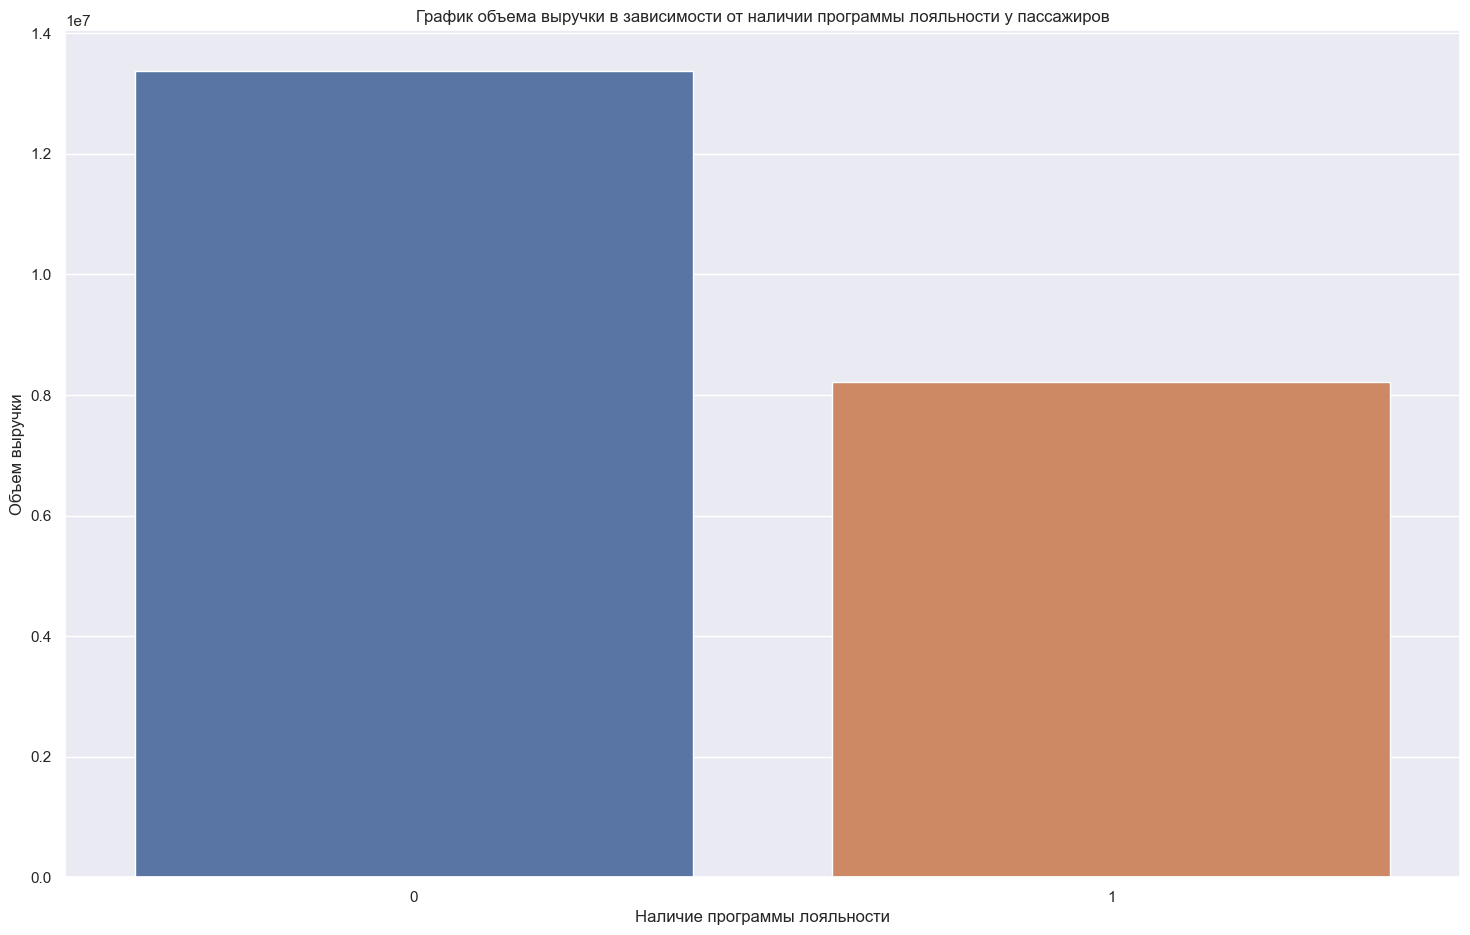

In [27]:
sns.barplot(data=FFP_Flag_table, x='FFP_Flag', y='Revenue_Amount')
plt.xlabel('Наличие программы лояльности')
plt.ylabel('Объем выручки')
plt.title('График объема выручки в зависимости от наличии программы лояльности у пассажиров')

### Вывод: <br>
1. По визуализированным данным на первый взгляд, можно сказать, что большая часть выручки по месяцам составила около 1000
2. Большая доля выручки состоит из билетов, купленным без программы лояльности, по билетам на международные рейсы и билетам, купленным онлайн
3. Большая часть клиентов - взрослые люди
4. Большая часть билетов была куплена онлайн
5. Пассажиров без программы лояльности больше, чем тех, кто имеет программу лояльности.
6. Не совсем понятна ситуация с долец выручки от ВВЛ и МВЛ. Детализация динамики выручки по этим показателям говорит о большей доли МВЛ, хотя если посмотреть на объемы выручки по ВВЛ и МВЛ, большую часть занимает ВВЛ

## 3.2

<AxesSubplot:>

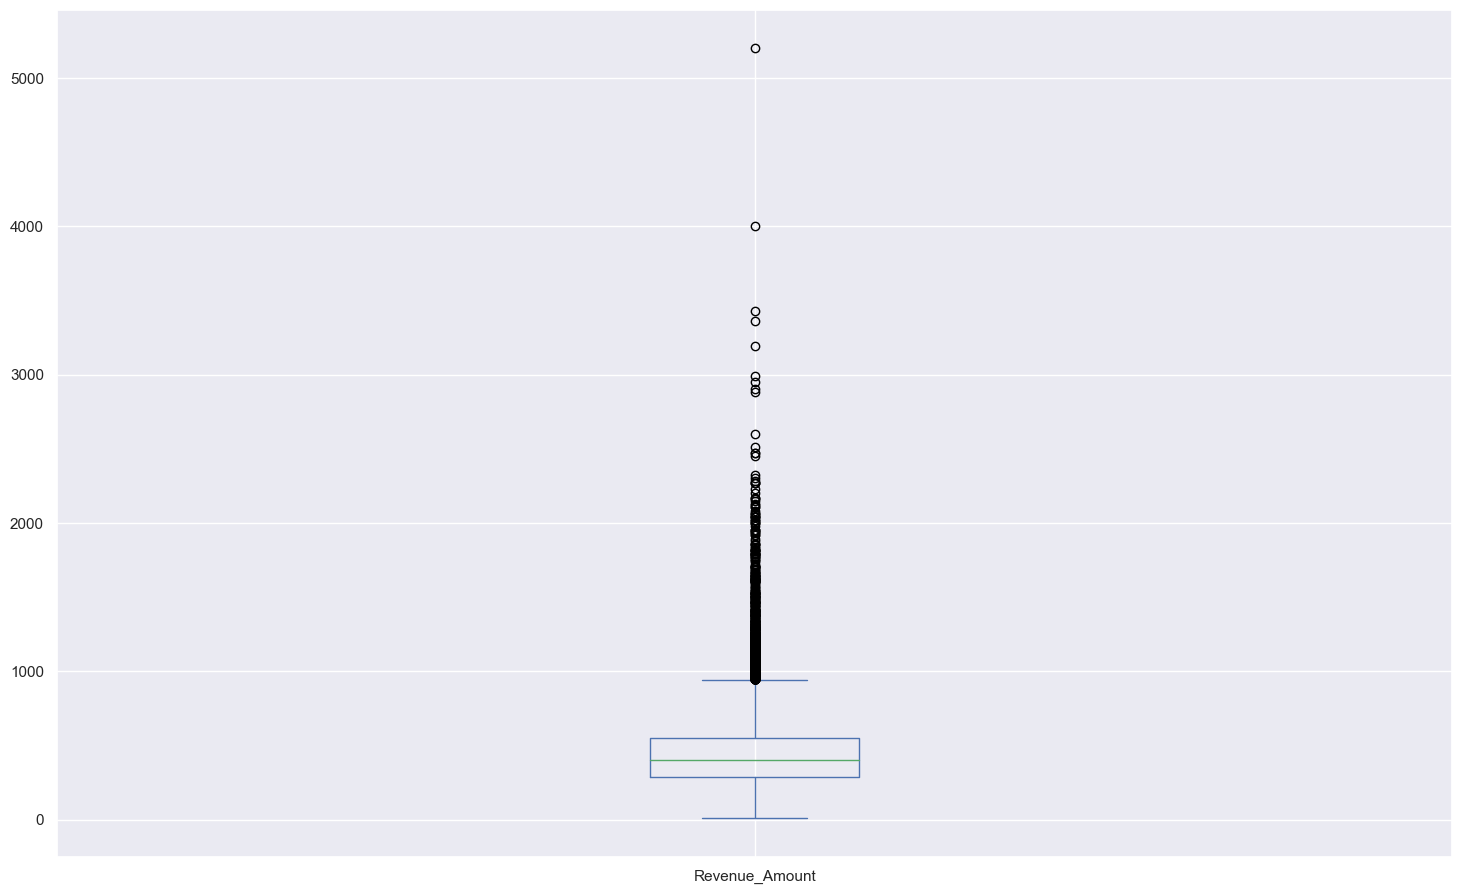

In [28]:
df['Revenue_Amount'].plot.box()
# коробка с усами показыввает наличие выбросов по выручке сверху

In [29]:
df.describe()

,Revenue_Amount,FFP_Flag
count,49362.000000,49362.000000
mean,437.631579,0.391718
std,214.611412,0.488139
min,10.000000,0.000000
25%,290.000000,0.000000
50%,400.000000,0.000000
75%,550.000000,1.000000
max,5200.000000,1.000000


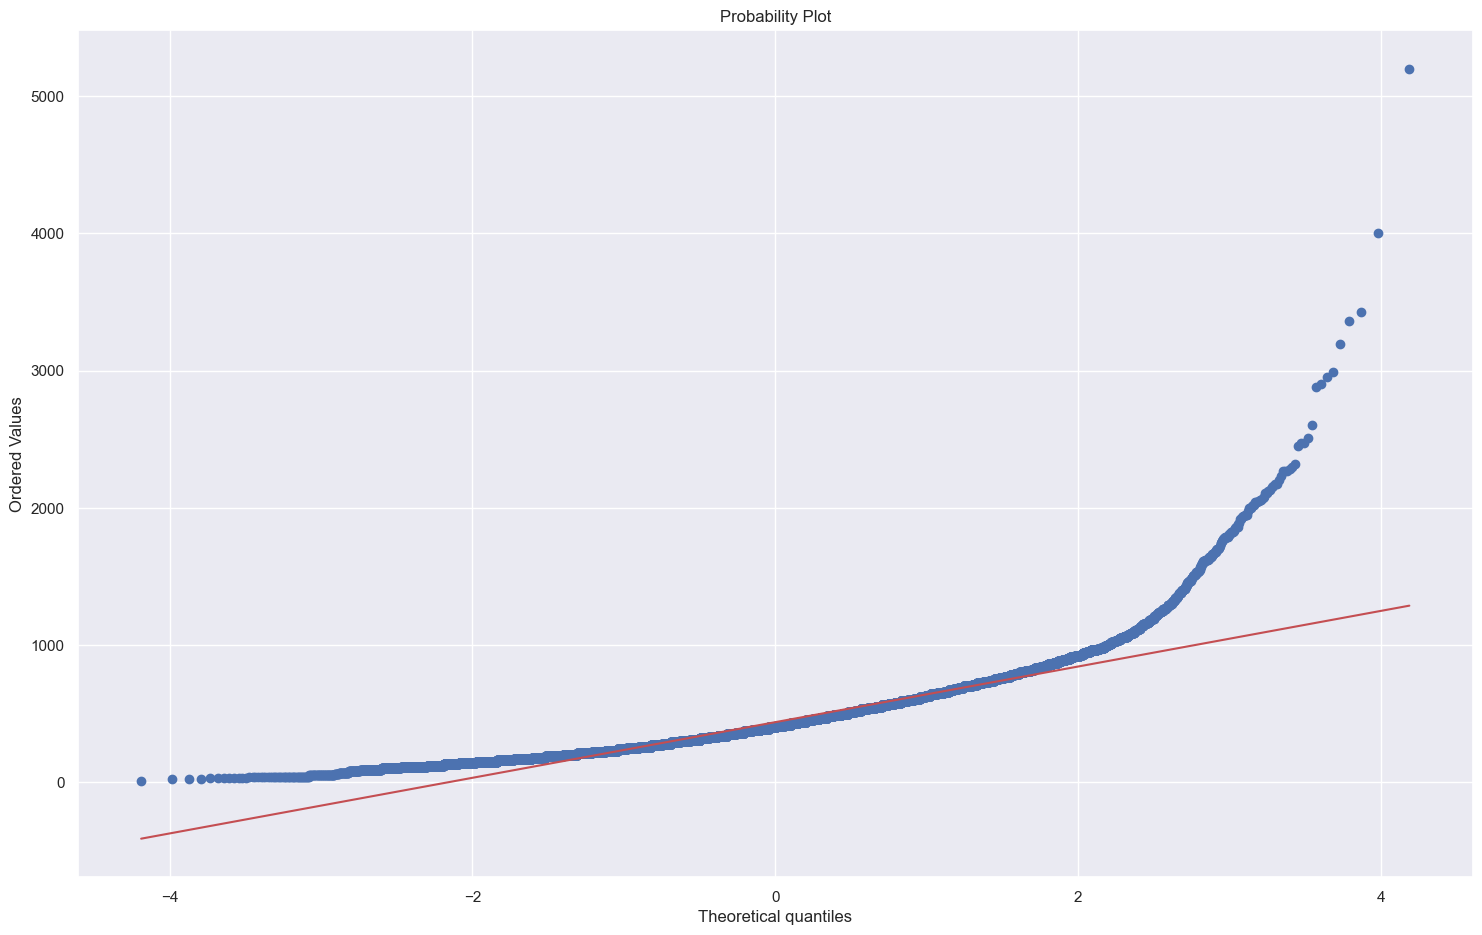

In [30]:
# проверим выборку на нормальность QQ-plot
st.probplot(df['Revenue_Amount'], dist='norm', plot=plt)
plt.show()

Выборка по выручке не имеет нормального распределения по QQ тесту

In [31]:
# установим границы для определения выбросов
total_stat =df.describe()
q3 = total_stat['Revenue_Amount']['75%']
q1 = total_stat['Revenue_Amount']['25%']
iqr = q3-q1 # межквартильный размах
iqr_min = q1 - 1.5*iqr
iqr_max = q3 + 1.5*iqr
print(iqr_min, iqr_max) #нижняя граница отрицательна, снизу выбросов нет

-100.0 940.0


In [32]:
df.query('Revenue_Amount > 940').count()
# Всего в датасете 987 выбросов, что составляет 2% от всего датасета
# можно удалить все выбросы из-за маленького их количества,
#но так как неизветсно естественные они или нет, лучше заменить на медиану

Issue_Date           987
Flight_Date_Loc      987
Pax_Type             987
Revenue_Amount       987
Orig_City_Code       987
Dest_City_Code       987
Route_Flight_Type    987
FFP_Flag             987
Sale_Type            987
dtype: int64

<AxesSubplot:xlabel='Revenue_Amount', ylabel='Density'>

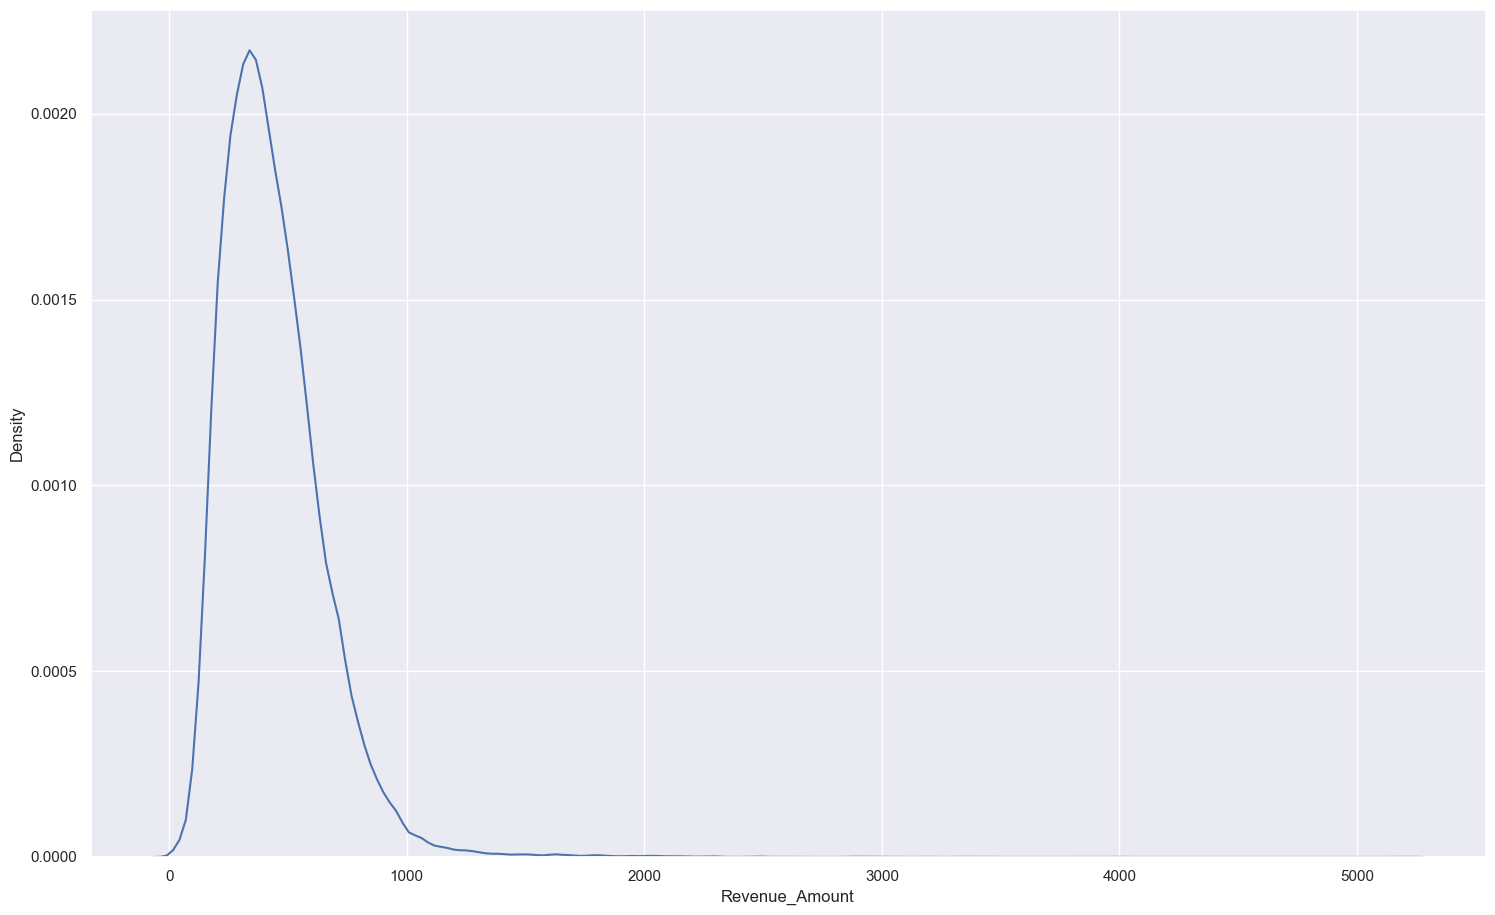

In [33]:
# посмотрим на график плотности
sns.kdeplot(df['Revenue_Amount'])
# он имеет большой хвост из-за выбросов сверху

In [34]:
# создадим датафрейм, из которого удалим выбросы
df_del = df['Revenue_Amount']
df_del = pd.DataFrame(df_del, columns=['Revenue_Amount'])
df_del[df_del['Revenue_Amount'] > 940].count()

Revenue_Amount    987
dtype: int64

In [35]:
# удаляем выбросы
df_del = df_del.drop(df_del[df_del['Revenue_Amount'] >= iqr_max].index)
df_del

,Revenue_Amount
0,200
1,610
2,390
3,190
4,190
...,...
49357,480
49358,270
49359,230
49360,270


In [36]:
df_del[df_del['Revenue_Amount'] > 940].count()

Revenue_Amount    0
dtype: int64

<AxesSubplot:>

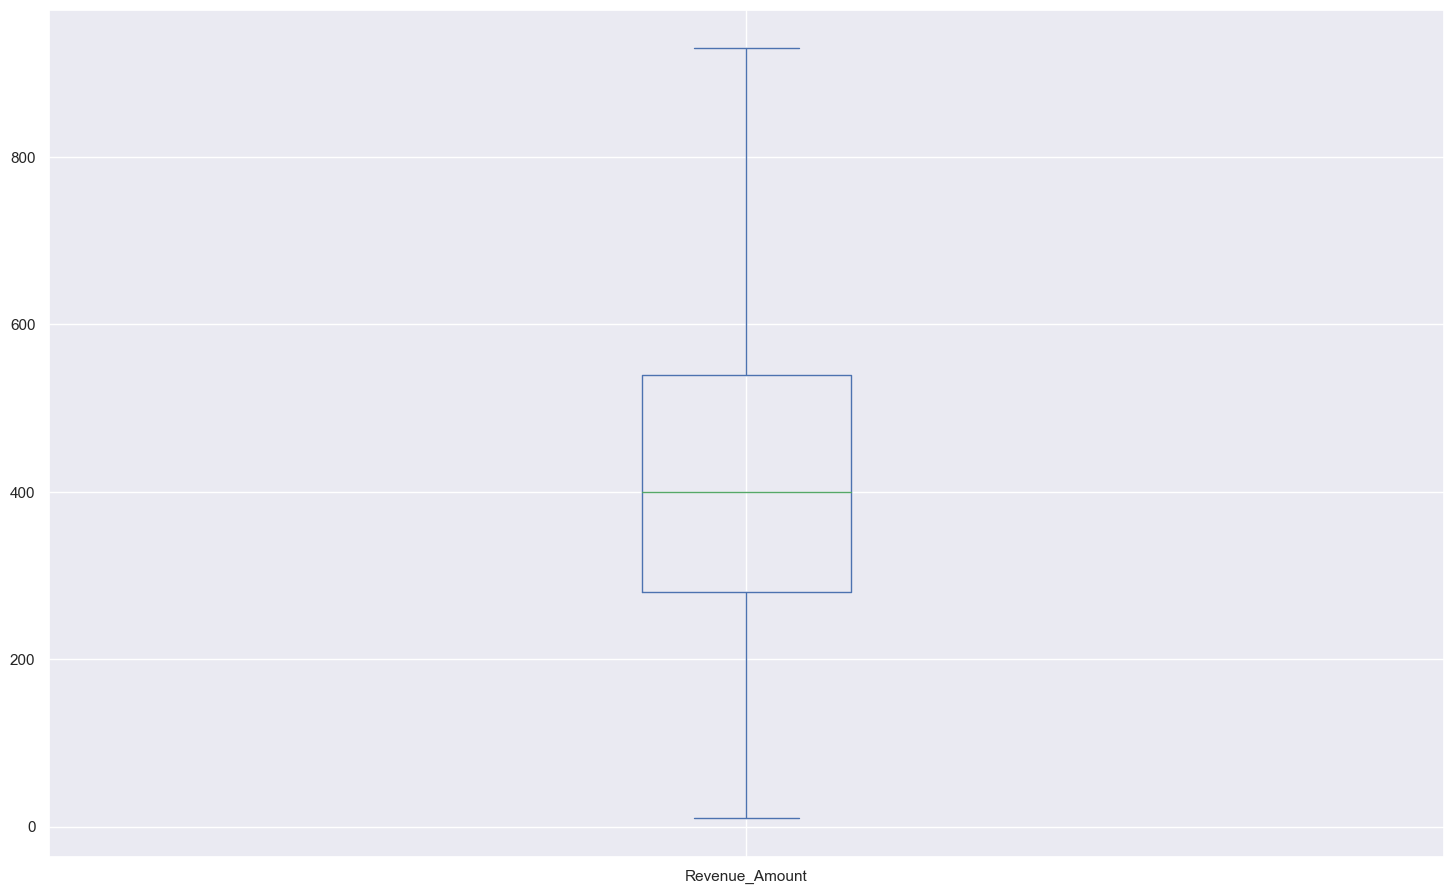

In [37]:
df_del['Revenue_Amount'].plot.box()

<AxesSubplot:xlabel='Revenue_Amount', ylabel='Density'>

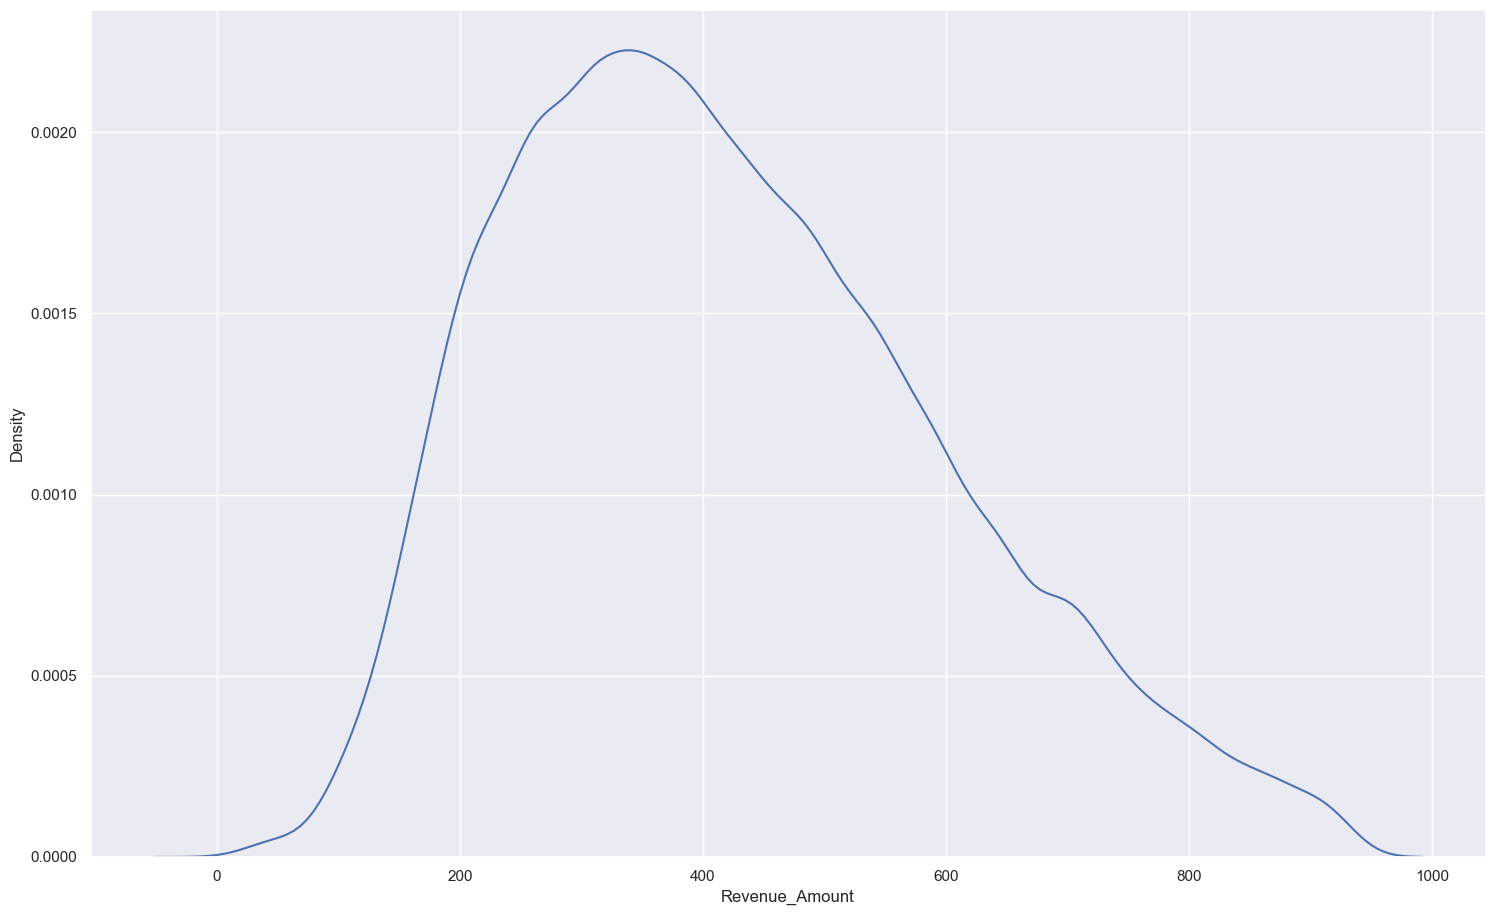

In [38]:
sns.kdeplot(df_del['Revenue_Amount'])

In [39]:
# все значения остались такие же как и при замене выбросов на медиану
df_del.describe()

,Revenue_Amount
count,48320.000000
mean,421.351407
std,177.791418
min,10.000000
25%,280.000000
50%,400.000000
75%,540.000000
max,930.000000


In [40]:
# заменим выбросы на медиану
Me = total_stat['Revenue_Amount']['50%']
df.loc[df['Revenue_Amount'] >= 940, 'Revenue_Amount'] = Me

<AxesSubplot:>

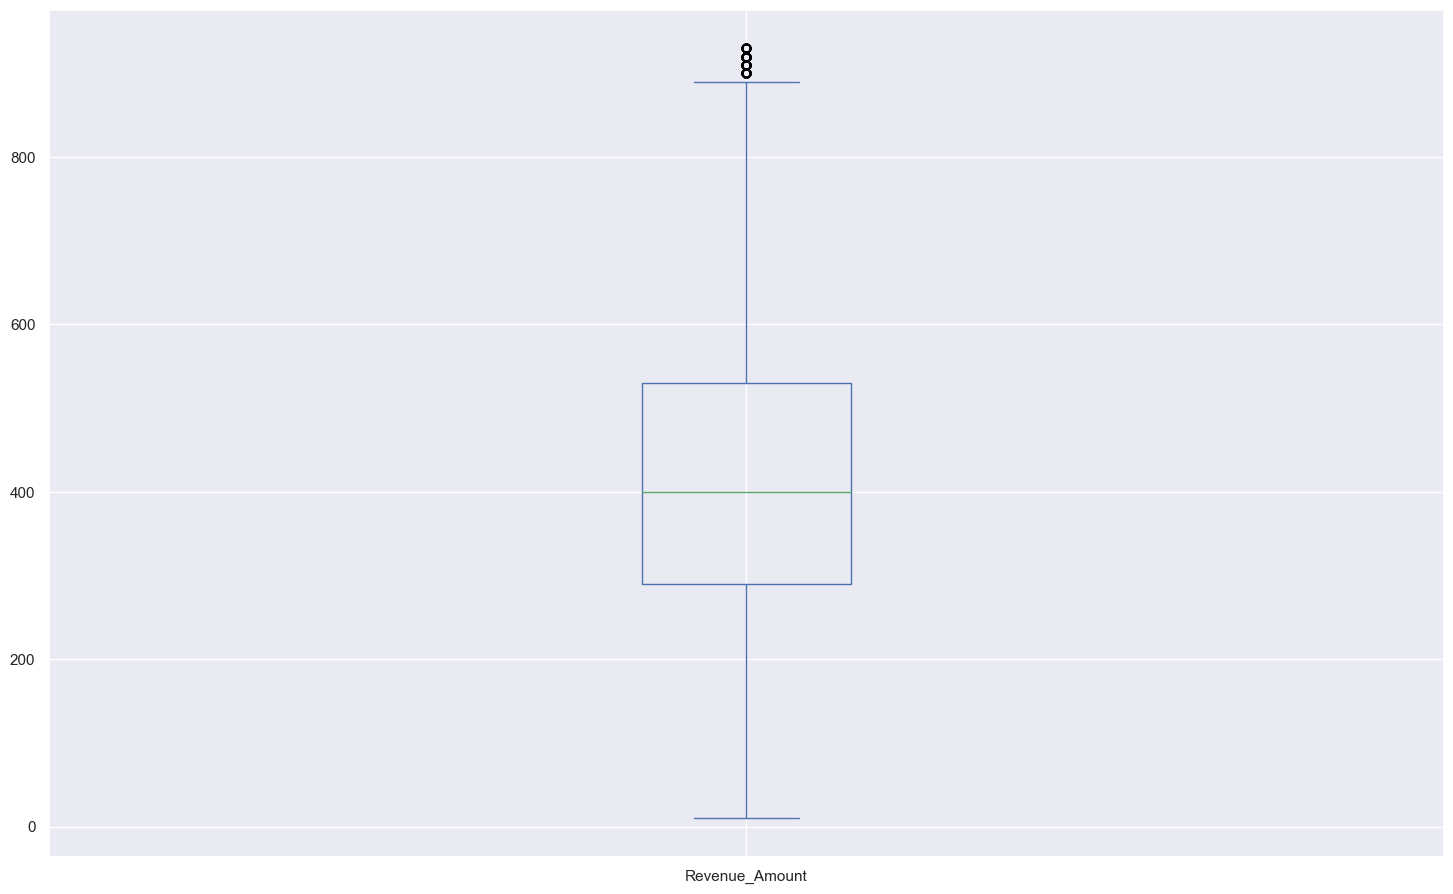

In [41]:
# посмотрим на ящик с усами
df['Revenue_Amount'].plot.box()
# он показывает наличие выбросов, предполагаю, что они остались из-за быбранного способа расчета диапазона крайних значений

<AxesSubplot:xlabel='Revenue_Amount', ylabel='Density'>

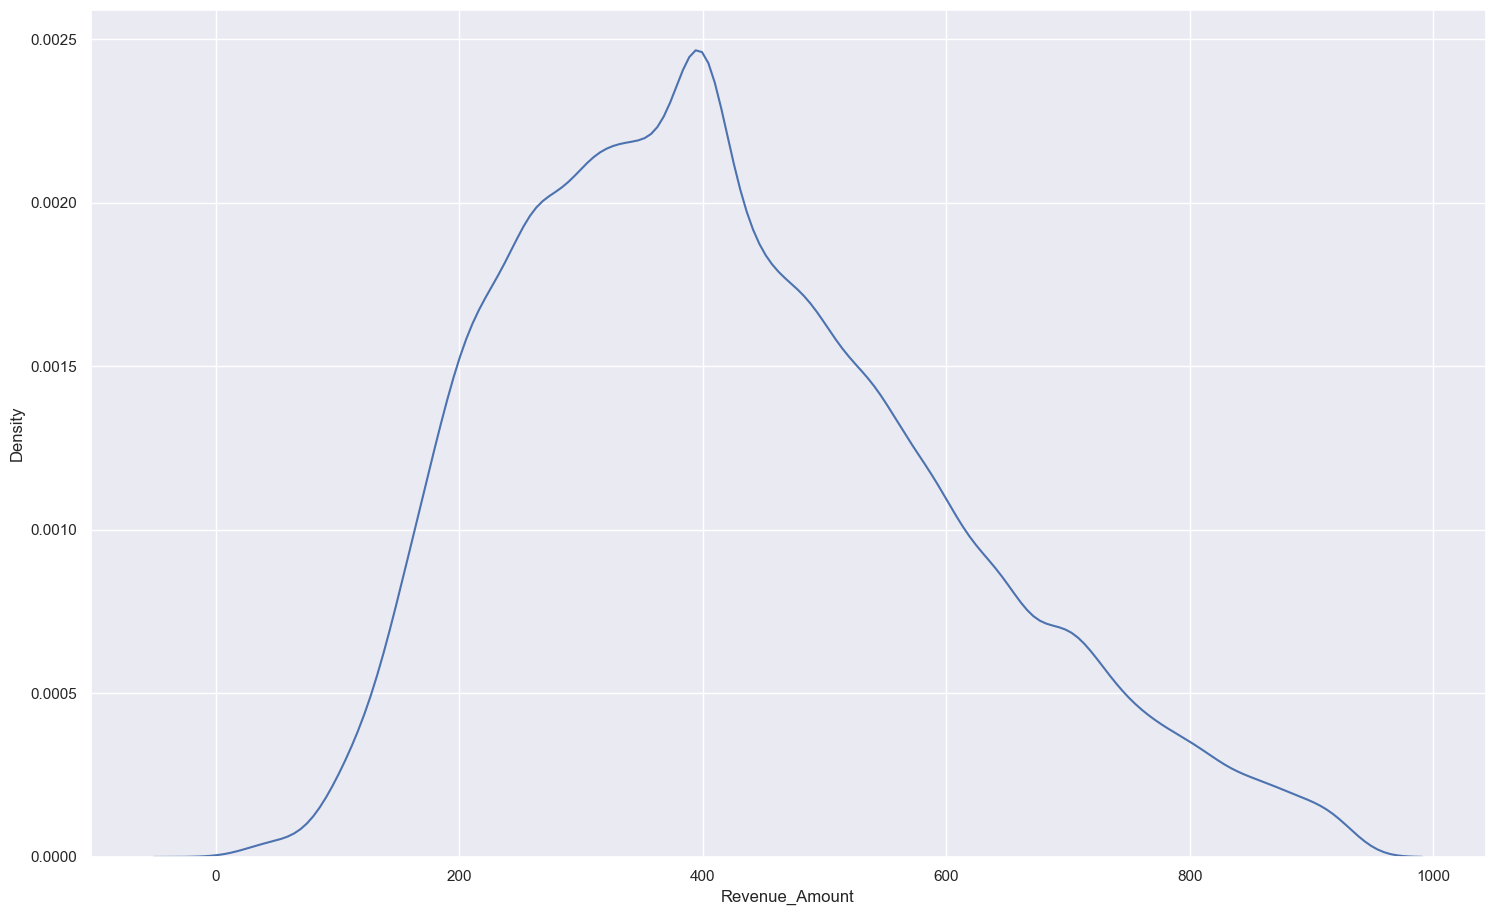

In [42]:
# посмотрим на график плотности без выбросов
sns.kdeplot(df['Revenue_Amount'])

In [43]:
df.describe()

,Revenue_Amount,FFP_Flag
count,49362.000000,49362.000000
mean,420.900693,0.391718
std,175.931614,0.488139
min,10.000000,0.000000
25%,290.000000,0.000000
50%,400.000000,0.000000
75%,530.000000,1.000000
max,930.000000,1.000000


### Вывод
По методу describe мы видим, что после замены выбросов на медианное значение, среднее по выручке уменьшилось незначительно, средняя ошибка отклонения так же уменьшилась, минимальное значение осталось неизменным как 25% и 50% квантили, 75% квантиль и максимальное значение уменьшились. При замене выбросов на медиану и при их удалении результат выходит одинаковый

## 3.3

In [44]:
df['Year'] = df['Issue_Date'].dt.year
df['Month'] = df['Issue_Date'].dt.month
issue = df.groupby(['Year', 'Month'])['Revenue_Amount'].sum()
Revenue = pd.DataFrame(data=issue).reset_index()
Revenue

,Year,Month,Revenue_Amount
0,2021,10,1294730
1,2021,11,1791060
2,2021,12,1696010
3,2022,1,1318350
4,2022,2,1311170
5,2022,3,1779280
6,2022,4,1966840
7,2022,5,1672720
8,2022,6,1560140
9,2022,7,2506800


In [45]:
# функция для добавления в датафрейм столбца с сезонами года
def season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    elif month in [9, 10, 11]:
        return 'Осень'
    else:
        return 'Неверный месяц'
df['Seasons'] = df['Month'].apply(lambda x: season(x))
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type,Year,Month,Seasons
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,2021,12,Зима
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,2021,12,Зима
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,2021,11,Осень
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,2021,12,Зима
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,2021,12,Зима
...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,2022,6,Лето
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,2022,6,Лето
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,2022,6,Лето
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,2022,6,Лето


Text(0.5, 1.0, 'График динамики выручки по сезонам года с детализацией по сезонам года')

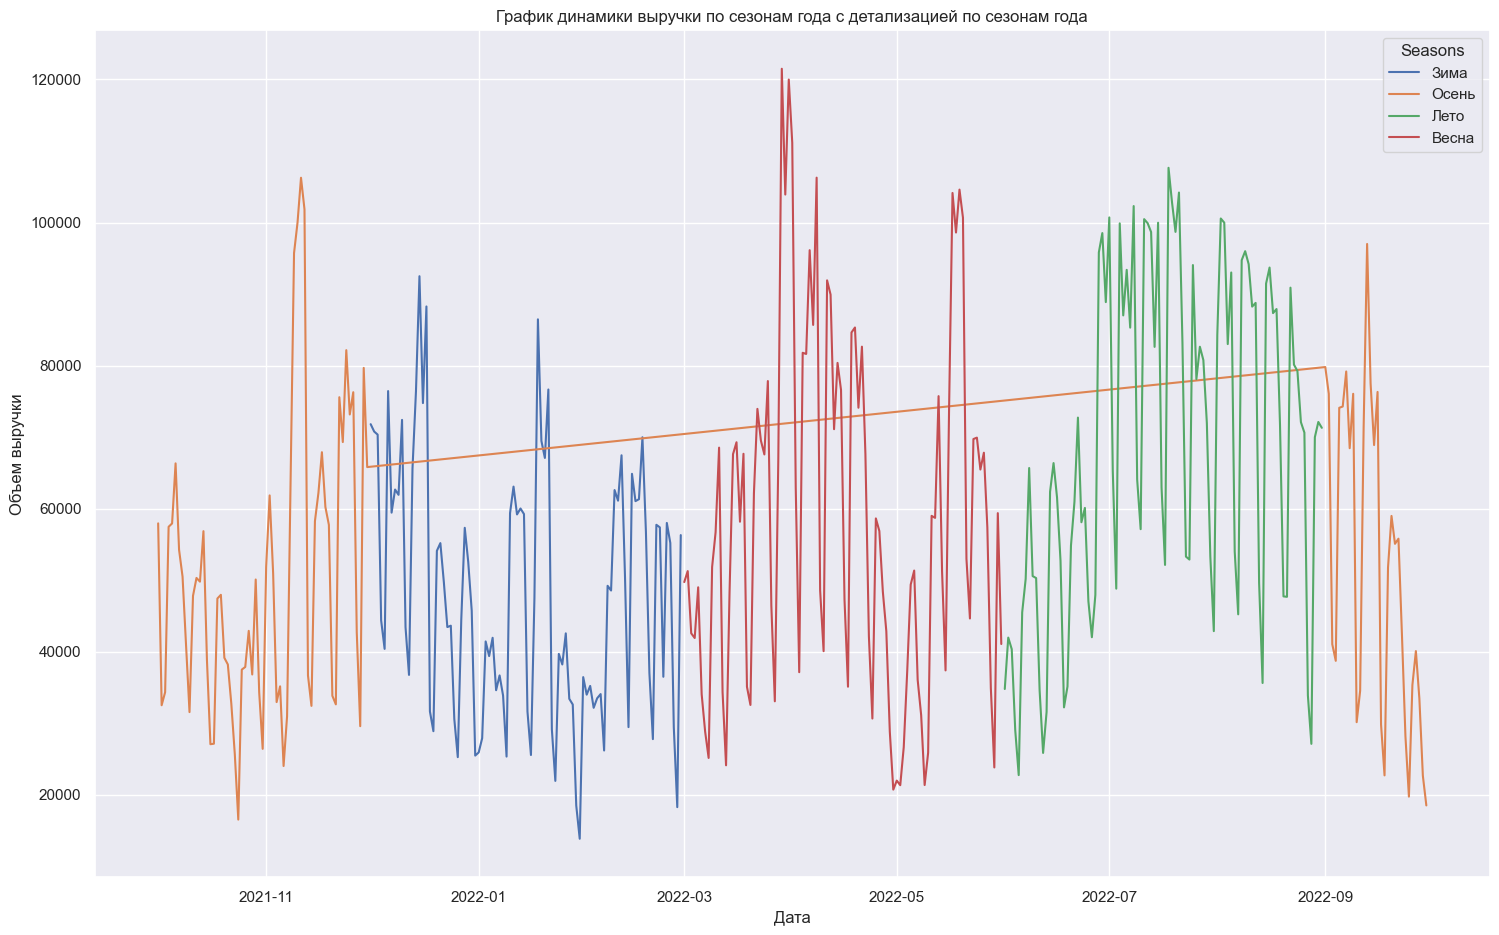

In [46]:
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=df, x='Issue_Date', y='Revenue_Amount', hue='Seasons', ci=None, estimator='sum')
plt.xlabel('Дата')
plt.ylabel('Объем выручки')
plt.title('График динамики выручки по сезонам года с детализацией по сезонам года')

### Проверка гипотезы
H0: выручка от продаж за зиму такая же как и выручка от продаж за осень <br>
H1: выручка от продаж за зиму отличается от выручки от продаж за осень

In [47]:
# составляем списки из выручки за зиму и осень по всему периоду времени
season_1 = df[df['Seasons'] == 'Зима']['Revenue_Amount']
season_2 = df[df['Seasons'] == 'Осень']['Revenue_Amount']

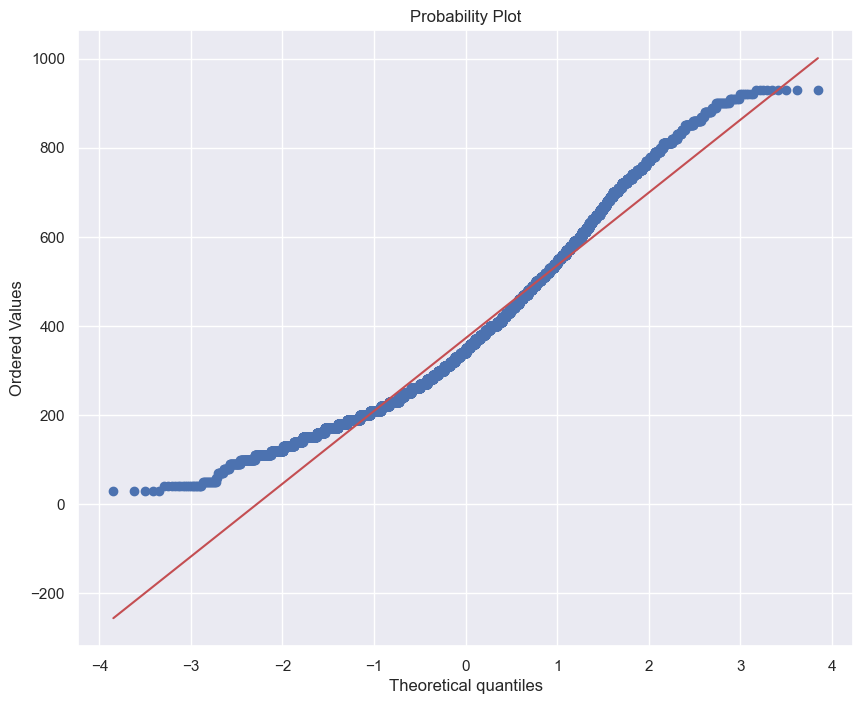

In [48]:
# проверим выборки на нормальность
plt.figure(figsize = (10, 8))
st.probplot(season_1, dist='norm', plot=plt)
plt.show()

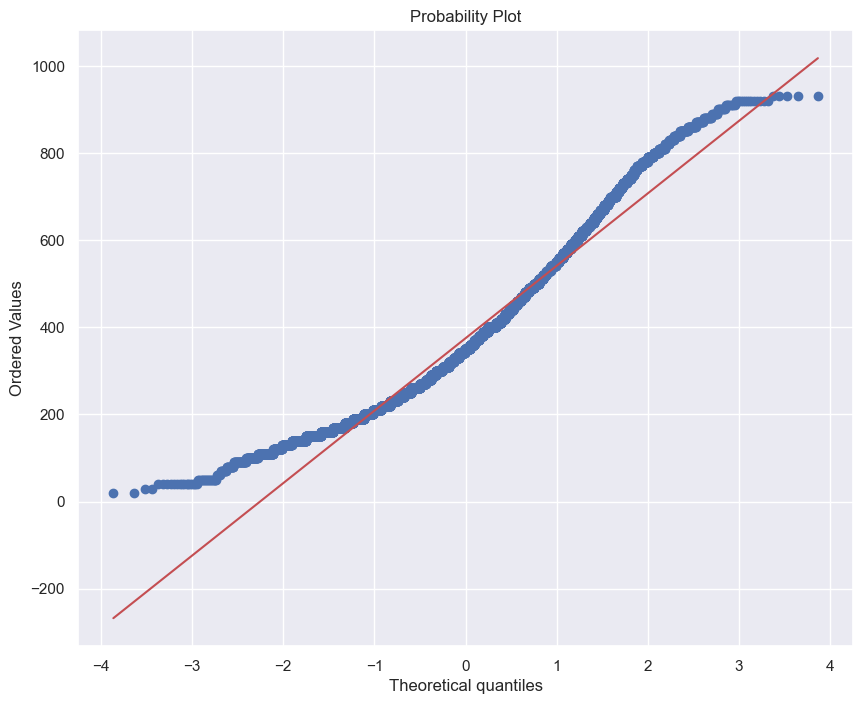

In [49]:
plt.figure(figsize = (10, 8))
st.probplot(season_2, dist='norm', plot=plt)
plt.show()

Обе выборки распределены не нормально

In [50]:
# проверим гипотезу по тесту Уилкоксона-Манна-Уитни
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(season_1, season_2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.42128526992187987
Не удалось отвергнуть нулевую гипотезу


### Вывод:
По проверки гипотезы мы принимаем нулевую гипотезу и говорим о равенстве выручки осенью и зимой

## Исследование выручки и числа продаж по месяцам

In [51]:
# создадим датасет из месяцев и выручки по ним за все время
Revenue_month = df.groupby('Month')['Revenue_Amount'].sum()
Count = df.groupby('Month')['Issue_Date'].count()
Revenue_month_count = pd.concat([Revenue_month, Count], axis=1).reset_index()
Revenue_month_count

,Month,Revenue_Amount,Issue_Date
0,1,1318350,3589
1,2,1311170,3453
2,3,1779280,4326
3,4,1966840,3974
4,5,1672720,3621
5,6,1560140,3353
6,7,2506800,5259
7,8,2301920,4787
8,9,1577480,3648
9,10,1294730,3615


Text(0.5, 1.0, 'График динамики выручки по месяцам')

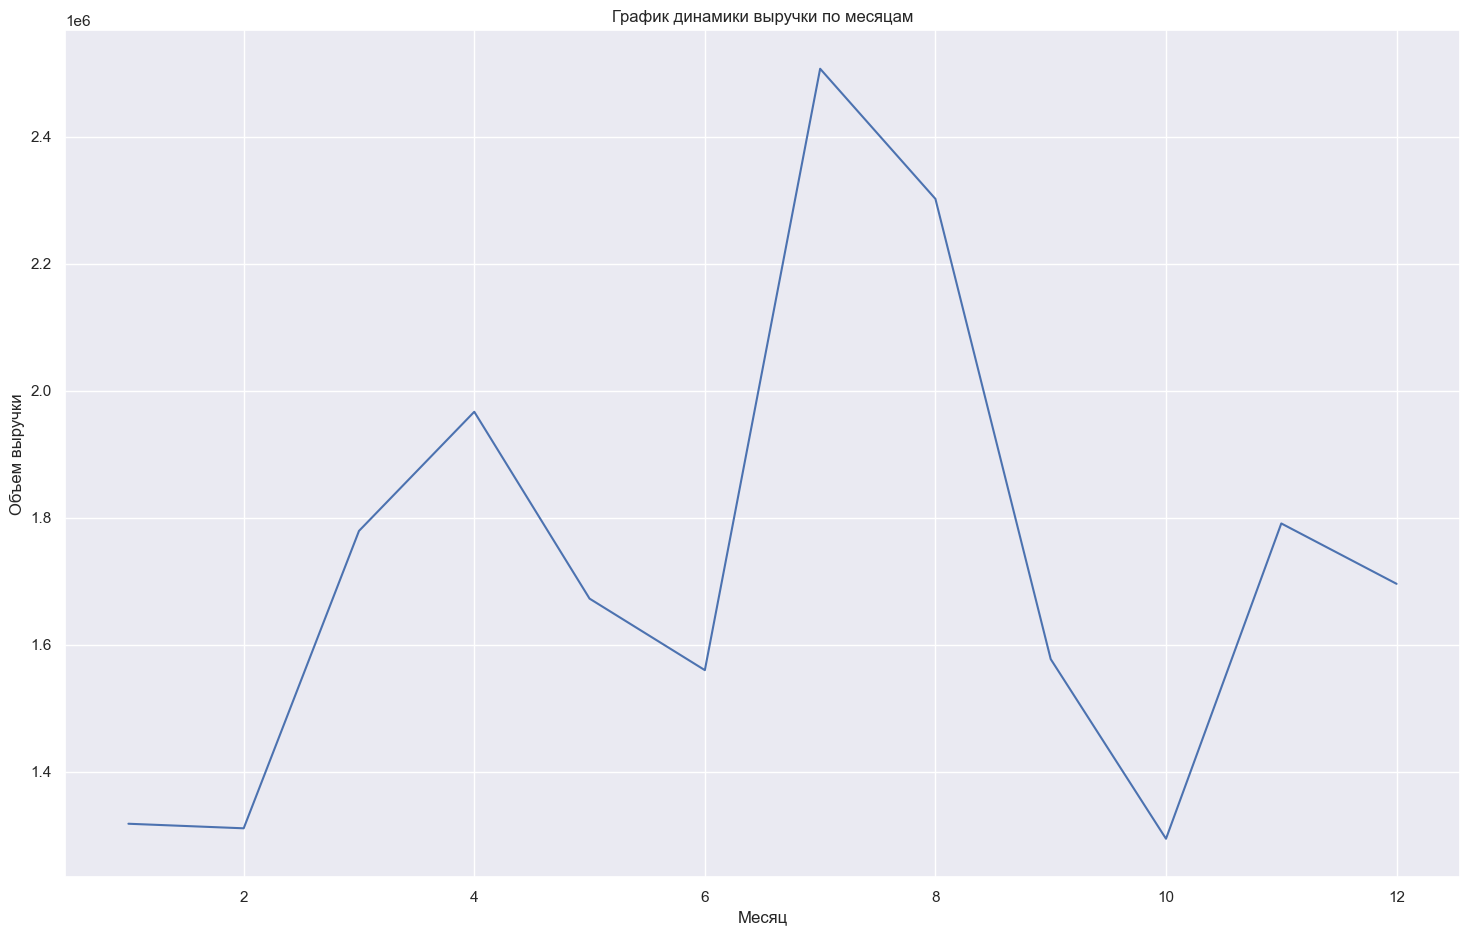

In [52]:
# построим на график выручки по месяцам
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=Revenue_month_count, x='Month', y='Revenue_Amount')
plt.xlabel('Месяц')
plt.ylabel('Объем выручки')
plt.title('График динамики выручки по месяцам')
# по графику видны скачки 

Text(0.5, 1.0, 'График числа продаж по месяцам')

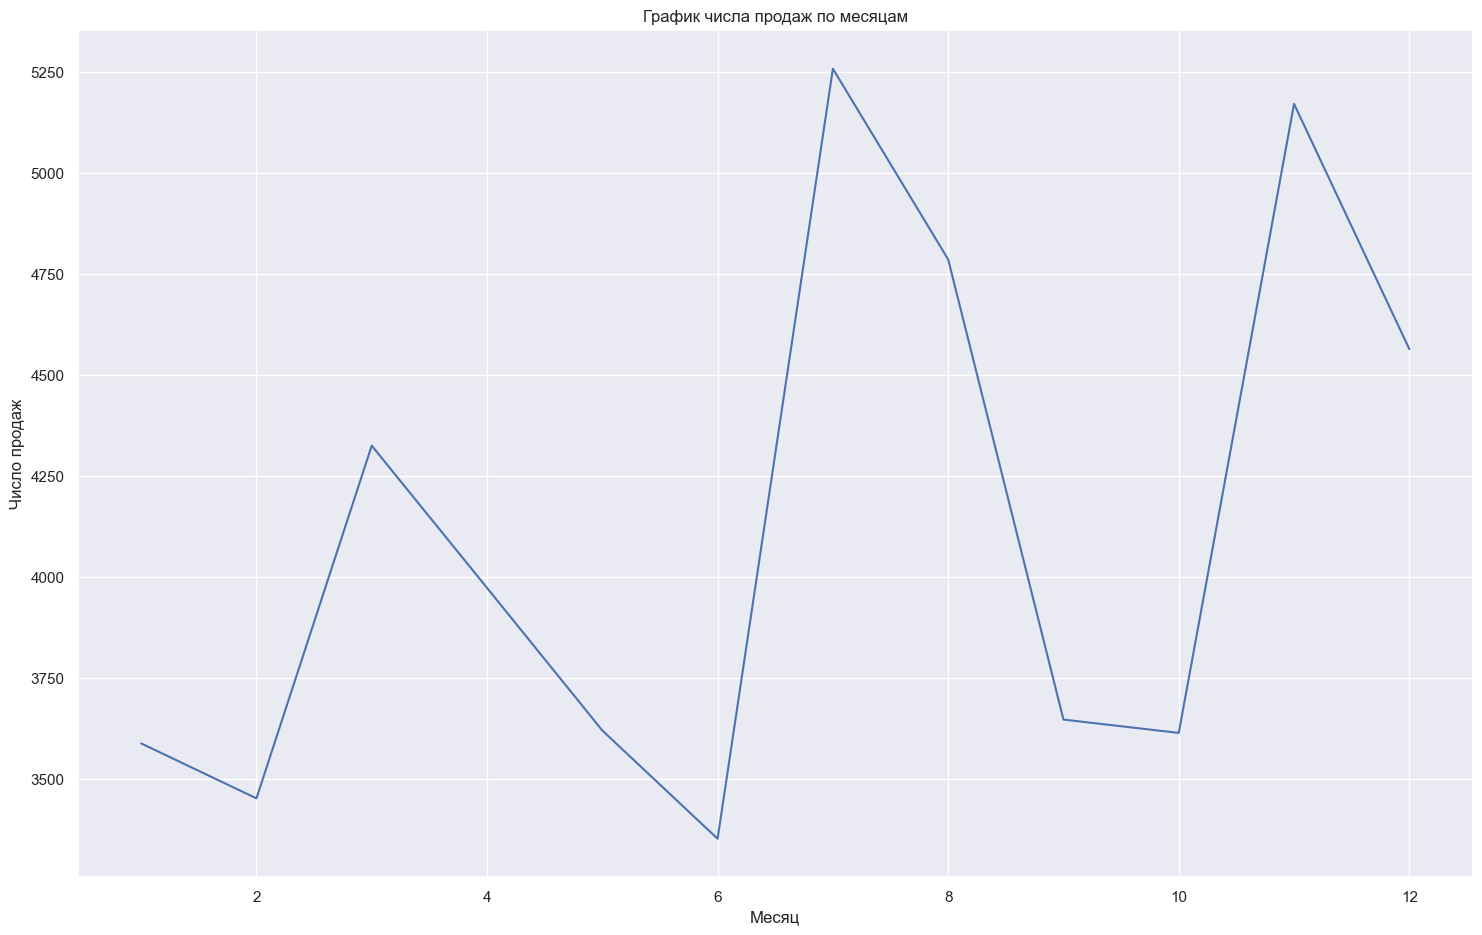

In [53]:
# посмотрим на график числа продаж по месяцам
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=Revenue_month_count, x='Month', y='Issue_Date')
plt.xlabel('Месяц')
plt.ylabel('Число продаж')
plt.title('График числа продаж по месяцам')

По графикам видно, что в тех месяцах, где большой объем продаж, большой объем выручки. Так же заметны всплески покупок в марте, июле и ноябре.

In [54]:
# посмотрим на корреляцию
Revenue_month_count.corr()

,Month,Revenue_Amount,Issue_Date
Month,1.000000,0.198321,0.460594
Revenue_Amount,0.198321,1.000000,0.784080
Issue_Date,0.460594,0.784080,1.000000


Коэффициент корреляции между количеством покупок и выручкой составляет 0,784, что говорит о высокой силе связи <br>
Несмотря на то, что на графиках можно увидеть закономерность, сила связи между месяцами и выручкой и месяцами и объемом покупок слабая и очень слабая 

## 3.4

In [55]:
# добавим столбец с количеством дней между днем вылета и днем покупки билета
df['Time'] = (df['Flight_Date_Loc'] - df['Issue_Date']).dt.days
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type,Year,Month,Seasons,Time
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,2021,12,Зима,35
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,2021,12,Зима,3
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,2021,11,Осень,37
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,2021,12,Зима,28
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,2021,12,Зима,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,2022,6,Лето,11
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,14
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,2022,6,Лето,3
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,2


In [56]:
# по количеству дней между перелетом и датой покупки билета с помощью 25% и 75% квантилей
total_stat = df.describe()
early = total_stat['Time']['25%'] # порог для поздно купленных билетов
late = total_stat['Time']['75%'] # порог для заранее купленных билетов
print('Количество дней между покупкой билетой и днем вылета, которые считаются коротким сроком:', early)
print('Количество дней между покупкой билетой и днем вылета, которые считаются длинным сроком:', late)

Количество дней между покупкой билетой и днем вылета, которые считаются коротким сроком: 3.0
Количество дней между покупкой билетой и днем вылета, которые считаются длинным сроком: 25.0


In [57]:
# выведем столбец с делением клиентов на группы
def term(time):
    if time > late:
        return 'Сильно заранее'
    elif time < early:
        return 'В последний момент'
    elif time >= early and time <= late:
        return 'Нормально'
    else:
        return 'Нет данных'
df['Terms'] = df['Time'].apply(lambda x: term(x))

In [58]:
# проверка гипотезы
#H0: выручка от покупок билетов сильно заранее и в последний момент одинаковы
#H1: выручка от покупок билетов сильно заранее и в последний момент разные
# создадим список из выручек из двух выборок
Revenue_early = df[df['Terms'] == 'Сильно заранее']['Revenue_Amount'] # выручка от тех, кто купил билет сильно заранее
Revenue_late = df[df['Terms'] == 'В последний момент']['Revenue_Amount']# выручка от тех, кто купил билет в последний момент

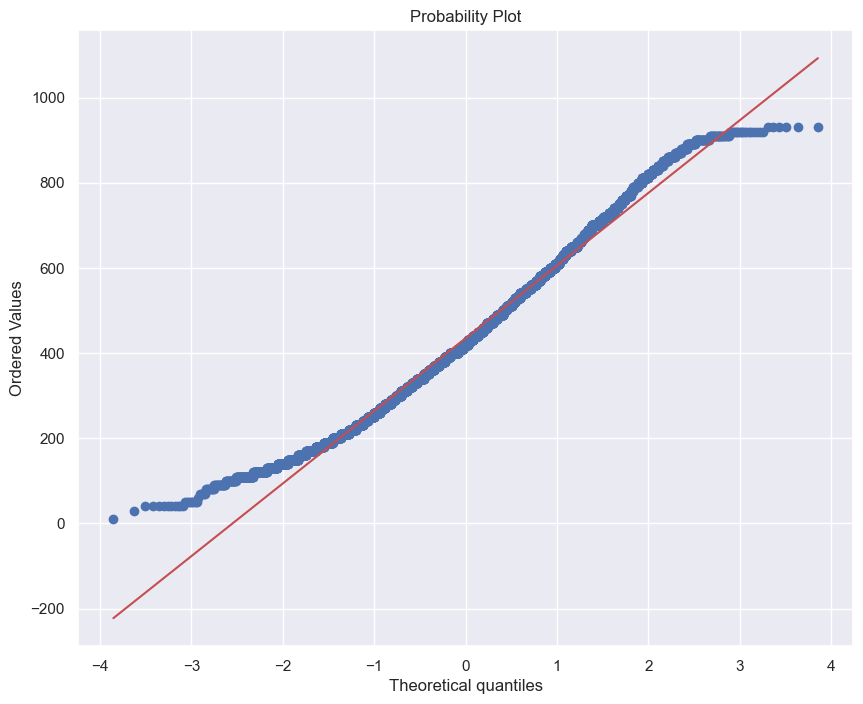

In [59]:
# прверим выборки на нормальность распределения по QQ plot
plt.figure(figsize = (10, 8))
st.probplot(Revenue_early, dist='norm', plot=plt)
plt.show()

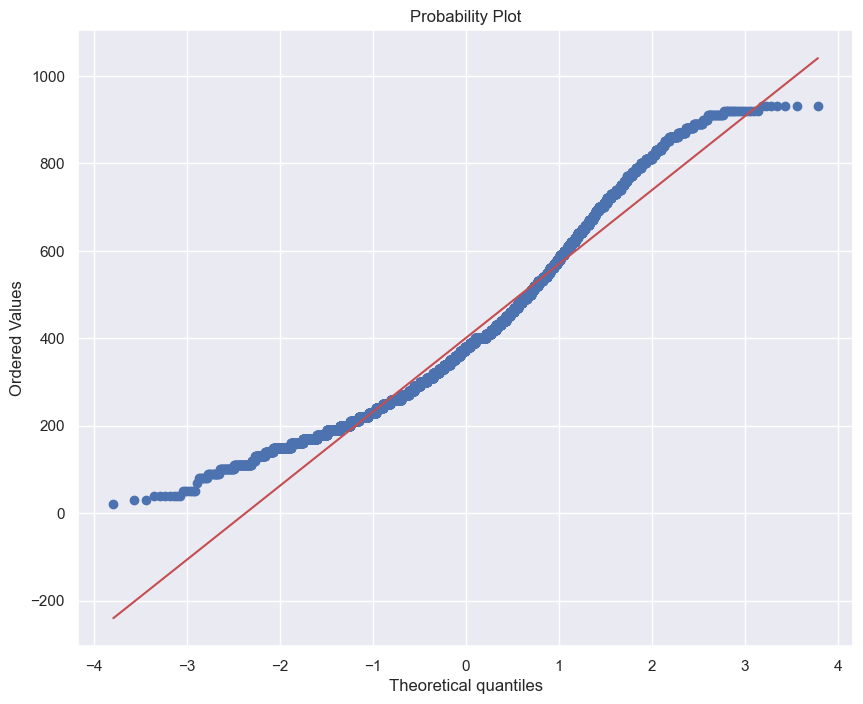

In [60]:
plt.figure(figsize = (10, 8))
st.probplot(Revenue_late, dist='norm', plot=plt)
plt.show()

Обе выборки не имеют нормального распределения

In [61]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(Revenue_early, Revenue_late)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 2.1768200119248587e-63
Следует отвергнуть нулевую гипотезу


#### Вывод: <br>
Мы отвергаем гипотезу о том, что выручка от тех клиентов, которые купили билет поздно равна выручке, которая была получена от клиентов, которые купили билет сильно заранее

## 3.5

Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:

In [69]:
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
airports = pd.read_csv(url, names =column_names)
airports.head()

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [70]:
airports.rename(columns={'IATA_Code':'Orig_City_Code'}, inplace=True)
airports

,Airport Name,Location,Country,Orig_City_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [71]:
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type,Year,Month,Seasons,Time,Terms
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,2021,12,Зима,35,Сильно заранее
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,2021,12,Зима,3,Нормально
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,2021,11,Осень,37,Сильно заранее
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,2021,12,Зима,28,Сильно заранее
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,2021,12,Зима,35,Сильно заранее
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,2022,6,Лето,11,Нормально
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,14,Нормально
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,2022,6,Лето,3,Нормально
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,2,В последний момент


In [72]:
# добавим в датафрейм столбцы с названием городов вылета
df_new = pd.merge(df, airports[['Location', 'Orig_City_Code']], on='Orig_City_Code', how='outer')
df_new

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type,Year,Month,Seasons,Time,Terms,Location
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,0.0,ONLINE,2021.0,12.0,Зима,35.0,Сильно заранее,NaN
1,2021-12-08,2022-01-12,AD,190.0,MOW,KRR,ВВЛ,1.0,OFFLINE,2021.0,12.0,Зима,35.0,Сильно заранее,NaN
2,2021-11-29,2022-01-14,AD,250.0,MOW,DUS,МВЛ,0.0,ONLINE,2021.0,11.0,Осень,46.0,Сильно заранее,NaN
3,2021-12-03,2022-01-06,AD,200.0,MOW,PEE,ВВЛ,1.0,ONLINE,2021.0,12.0,Зима,34.0,Сильно заранее,NaN
4,2021-11-28,2022-01-07,CHD,70.0,MOW,AER,ВВЛ,1.0,ONLINE,2021.0,11.0,Осень,40.0,Сильно заранее,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56922,NaT,NaT,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sugapa-Papua Island
56923,NaT,NaT,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eilat
56924,NaT,NaT,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al Masna'ah
56925,NaT,NaT,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cagayan de Oro City


при переносе информации из одного датасета в другой некоторые названия городов не перенеслись и заполнились пустыми значениями. Скорее всего что-то не так с кодами городов

In [73]:
# мы видим, что большая часть пропусков в городе с кодом MOW
df_new[df_new['Location'].isna()]['Orig_City_Code'].value_counts()

MOW    15911
GRV      140
BAK       75
SEL       12
NQZ       11
\N        10
MIL        9
TOX        8
PAR        8
BER        6
ROM        5
HTU        1
SIO        1
KRA        1
KPS        1
KGY        1
MRG        1
RPM        1
QRM        1
PPI        1
WGT        1
SNB        1
SWC        1
TYB        1
TUM        1
GUH        1
WKB        1
QRR        1
NGA        1
UUN        1
HXX        1
CWW        1
ECH        1
VLK        1
OHH        1
TYO        1
LON        1
DWD        1
KMX        1
BPH        1
MXI        1
BGN        1
RTC        1
DYA        1
ARY        1
BLN        1
BZD        1
BWQ        1
CVC        1
CYG        1
CMD        1
DRN        1
XEN        1
Name: Orig_City_Code, dtype: int64

In [75]:
# видно, что некоторые направления занимают довольно большую часть всего датасета, поэтому мы можем пренебречь некоторыми порпусками, но при изучении выручки это может повлиять на достоверность результатов
df_new['Location'].value_counts()

Novosibirsk            8224
Sochi                  2102
St. Petersburg         1960
Irkutsk                1368
Kazan                   901
                       ... 
Osijek                    1
Dubrovnik                 1
Akrotiri                  1
Stara Zagora              1
Cagayan de Oro City       1
Name: Location, Length: 6955, dtype: int64

In [76]:
# при вызове из второго датасета кода соответствующему городу москва мы видим, что у него код не MOW, как в нашем датасете, так еще и имеет разные кода
airports[airports['Location'] == 'Moscow']['Orig_City_Code']

2985     SVO
2988     VKO
4029     DME
4360     BKA
8661     OSF
11986     \N
Name: Orig_City_Code, dtype: object

In [77]:
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
airports = pd.read_csv(url, names =column_names)
airports.head()

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [78]:
# попробуем объединить все через словари
airport_to_city1 = dict(zip(airports['IATA_Code'], airports['Location']))
airport_to_city2 = dict(zip(airports['IATA_Code'], airports['Location']))
airport_to_city = airport_to_city1.copy()
airport_to_city.update(airport_to_city2)

In [79]:
# в словаре есть пропущенные значения, которые можно просто заменить
airport_to_city['MOW'] = 'Moscow'
airport_to_city['BAK'] = 'Baku' 
airport_to_city['BER'] = 'Berlin'
airport_to_city['GRV'] = 'Grozny'
airport_to_city['LON'] = 'London'
airport_to_city['MIL'] = 'Milan'
airport_to_city['NQZ'] = 'Astana'
airport_to_city['OHH'] = 'Okha'
airport_to_city['PAR'] = 'Paris'
airport_to_city['ROM'] = 'Rome'
airport_to_city['SEL'] = 'Seoul'
airport_to_city['TOX'] = 'Tobolsk'
airport_to_city['TYO'] = 'Tokyo'

In [80]:
# добавляем столбцы с названиями городов в датасет
df['Orig_City'] = df['Orig_City_Code'].map(airport_to_city)
df['Dest_City'] = df['Dest_City_Code'].map(airport_to_city)

In [81]:
df['flight_direction'] = df['Orig_City'] + ' - ' + df['Dest_City']
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type,Year,Month,Seasons,Time,Terms,Orig_City,Dest_City,flight_direction
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,2021,12,Зима,35,Сильно заранее,Moscow,Kaliningrad,Moscow - Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,2021,12,Зима,3,Нормально,Yuzhno-sakhalinsk,Novosibirsk,Yuzhno-sakhalinsk - Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,2021,11,Осень,37,Сильно заранее,Kaliningrad,Moscow,Kaliningrad - Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,2021,12,Зима,28,Сильно заранее,Voronezh,Moscow,Voronezh - Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,2021,12,Зима,35,Сильно заранее,Moscow,Krasnodar,Moscow - Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,2022,6,Лето,11,Нормально,Moscow,Omsk,Moscow - Omsk
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,14,Нормально,St. Petersburg,Moscow,St. Petersburg - Moscow
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,2022,6,Лето,3,Нормально,Moscow,Kazan,Moscow - Kazan
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,2,В последний момент,Kazan,Moscow,Kazan - Moscow


In [82]:
top_10_VVL = df[df['Route_Flight_Type'] == 'ВВЛ']['flight_direction'].value_counts().head(10)
top_10_MVL = df[df['Route_Flight_Type'] == 'МВЛ']['flight_direction'].value_counts().head(10)

In [83]:
top_10_VVL

Sochi - Moscow             1341
Moscow - Sochi             1309
St. Petersburg - Moscow    1212
Moscow - St. Petersburg    1192
Novosibirsk - Moscow        972
Moscow - Novosibirsk        956
Kazan - Moscow              760
Moscow - Kazan              758
Moscow - Ufa                708
Novosibirsk - Sochi         695
Name: flight_direction, dtype: int64

In [84]:
top_10_MVL

Moscow - Osh               154
Khudzhand - Moscow         146
Osh - Moscow               136
Moscow - Khudzhand         130
Novosibirsk - Osh          122
Novosibirsk - Bishkek      121
Osh - Novosibirsk          116
Khudzhand - Novosibirsk    116
Moscow - Antalya           107
Bishkek - Novosibirsk      102
Name: flight_direction, dtype: int64

In [86]:
df_Revenue = df.pivot_table(index=['flight_direction', 'Route_Flight_Type'], aggfunc='sum', values='Revenue_Amount').reset_index()
df_Revenue = df_Revenue.sort_values(by='Revenue_Amount', ascending=False)
df_Revenue

,flight_direction,Route_Flight_Type,Revenue_Amount
537,Sochi - Moscow,ВВЛ,519970
321,Moscow - Sochi,ВВЛ,487280
413,Novosibirsk - Moscow,ВВЛ,462720
300,Moscow - Novosibirsk,ВВЛ,444700
437,Novosibirsk - Sochi,ВВЛ,392730
...,...,...,...
33,Bangkok - Phuket,МВЛ,180
98,Frankfurt - Heraklion,МВЛ,180
499,Pula - Moscow,МВЛ,100
407,Novosibirsk - Larnaca,МВЛ,90


### Визуализация выручки

In [118]:
flight_direction_mvl = df[df['Route_Flight_Type'] == 'МВЛ'].pivot_table(index='flight_direction', aggfunc=['count', 'sum'], values='Revenue_Amount' ).reset_index()
flight_direction_mvl.columns = ['flight_direction', 'Count', 'Revenue_Amount']
top10_mvl = flight_direction_mvl.sort_values(by='Count', ascending=False).head(10)
top10_mvl

,flight_direction,Count,Revenue_Amount
170,Moscow - Osh,154,68790
102,Khudzhand - Moscow,146,95990
229,Osh - Moscow,136,80920
161,Moscow - Khudzhand,130,58110
214,Novosibirsk - Osh,122,48650
202,Novosibirsk - Bishkek,121,47380
104,Khudzhand - Novosibirsk,116,57740
231,Osh - Novosibirsk,116,57380
141,Moscow - Antalya,107,40480
30,Bishkek - Novosibirsk,102,48300


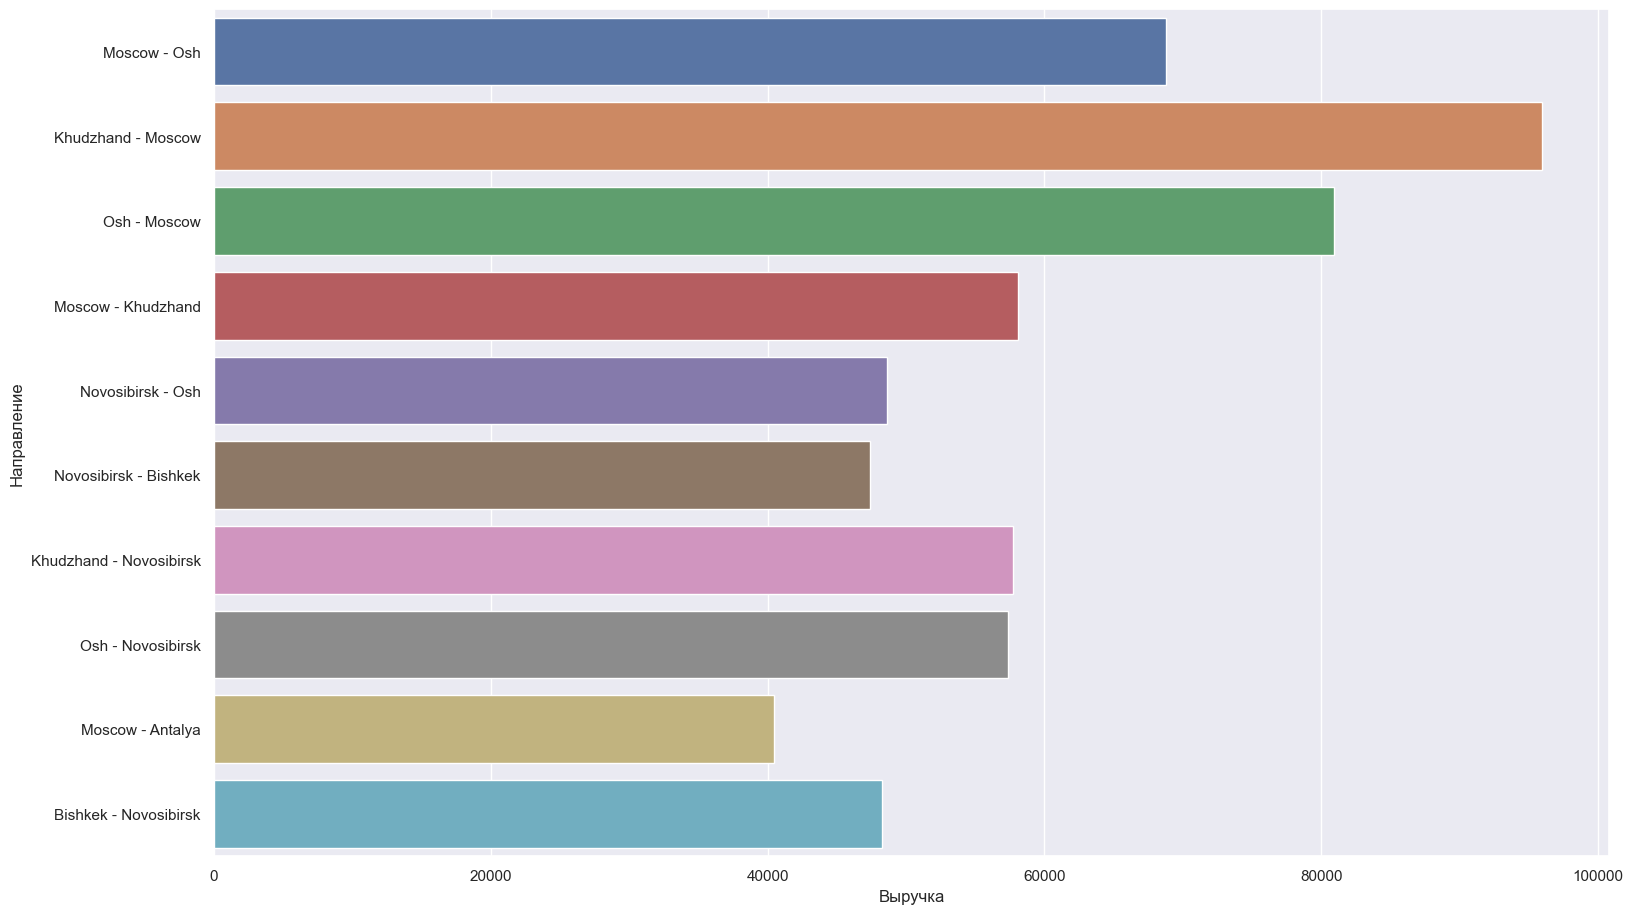

In [119]:
sns.barplot(data=top10_mvl, y='flight_direction', x='Revenue_Amount').set(xlabel='Выручка', ylabel='Направление')
plt.show()

In [120]:
flight_direction_vvl = df[df['Route_Flight_Type'] == 'ВВЛ'].pivot_table(index='flight_direction', aggfunc=['count', 'sum'], values='Revenue_Amount' ).reset_index()
flight_direction_vvl.columns = ['flight_direction', 'Count', 'Revenue_Amount']
top10_vvl = flight_direction_vvl.sort_values(by='Count', ascending=False).head(10)
top10_vvl

,flight_direction,Count,Revenue_Amount
266,Sochi - Moscow,1341,519970
143,Moscow - Sochi,1309,487280
271,St. Petersburg - Moscow,1212,281270
144,Moscow - St. Petersburg,1192,274520
201,Novosibirsk - Moscow,972,462720
130,Moscow - Novosibirsk,956,444700
55,Kazan - Moscow,760,205630
112,Moscow - Kazan,758,205060
148,Moscow - Ufa,708,210610
218,Novosibirsk - Sochi,695,392730


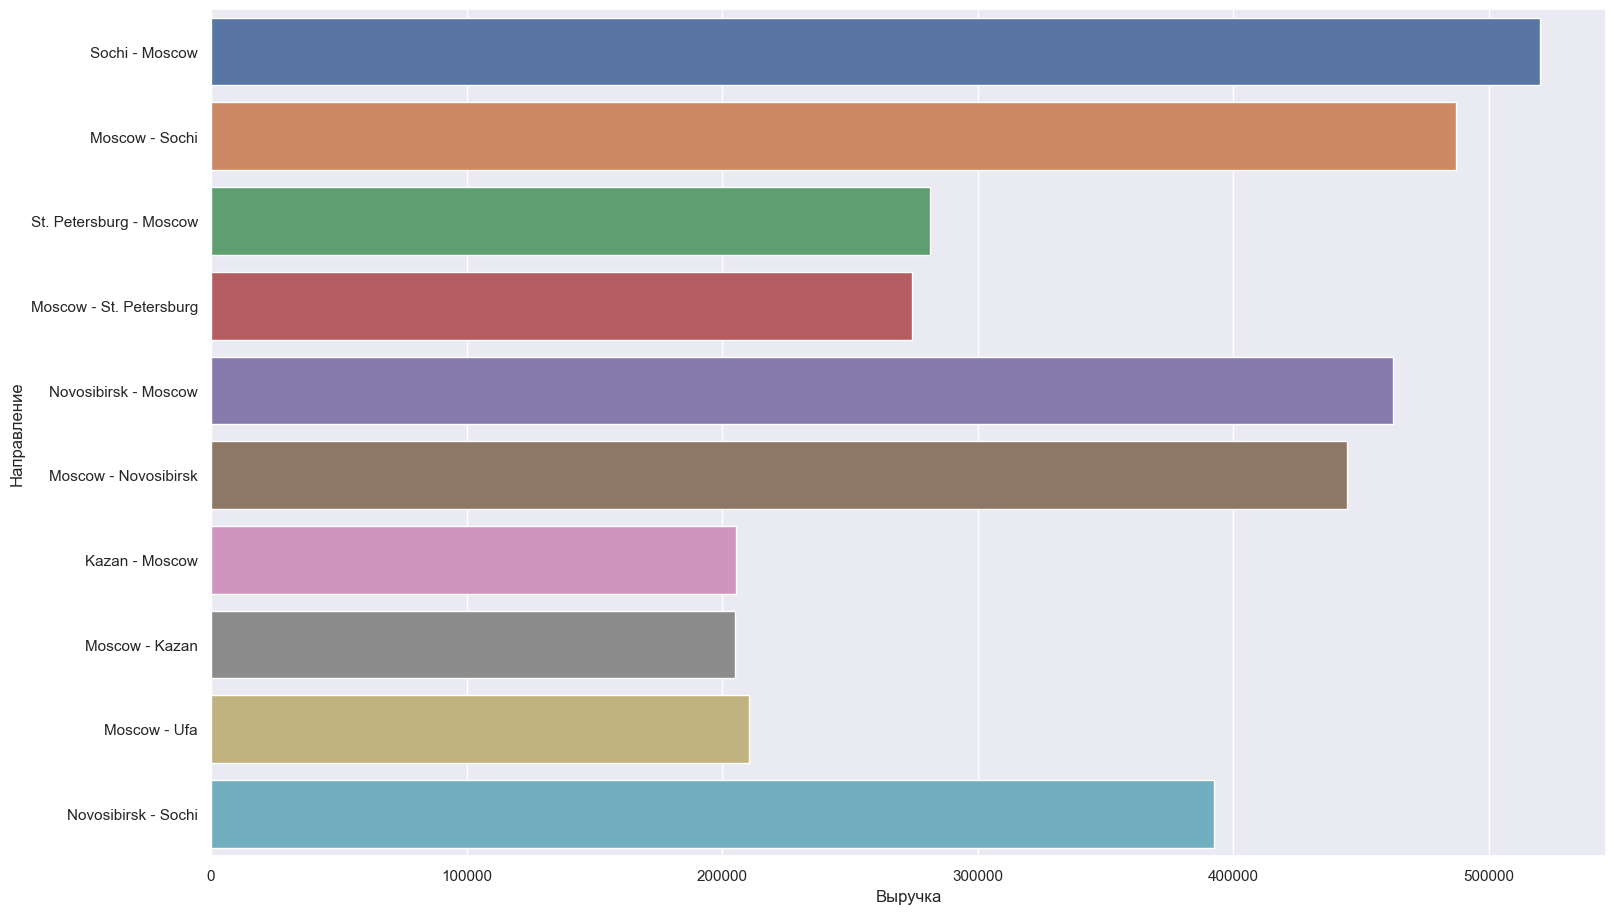

In [121]:
sns.barplot(data=top10_vvl, y='flight_direction', x='Revenue_Amount').set(xlabel='Выручка', ylabel='Направление')
plt.show()

### Вывод: <br>
При переносе названия городов из одного датасета в другой некоторых данных не было, поэтому рейтинг был составлен по кодам городов, а не их названиям. <br>
Первое место по перелетам в России занимает перелет из Сочи в Москву, а по международным рейсам первое место занимает перелет из Москвы в Ош. Так же чем больше количество перелетов, тем больше составила выручка.

## 3.6

In [122]:
df

,Issue_Date,Flight_Date_Loc,Pax_Type,Revenue_Amount,Orig_City_Code,Dest_City_Code,Route_Flight_Type,FFP_Flag,Sale_Type,Year,Month,Seasons,Time,Terms,Orig_City,Dest_City,flight_direction
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,2021,12,Зима,35,Сильно заранее,Moscow,Kaliningrad,Moscow - Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,2021,12,Зима,3,Нормально,Yuzhno-sakhalinsk,Novosibirsk,Yuzhno-sakhalinsk - Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,2021,11,Осень,37,Сильно заранее,Kaliningrad,Moscow,Kaliningrad - Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,2021,12,Зима,28,Сильно заранее,Voronezh,Moscow,Voronezh - Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,2021,12,Зима,35,Сильно заранее,Moscow,Krasnodar,Moscow - Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,2022,6,Лето,11,Нормально,Moscow,Omsk,Moscow - Omsk
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,14,Нормально,St. Petersburg,Moscow,St. Petersburg - Moscow
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,2022,6,Лето,3,Нормально,Moscow,Kazan,Moscow - Kazan
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,2022,6,Лето,2,В последний момент,Kazan,Moscow,Kazan - Moscow


Text(0.5, 1.0, 'Матрица корреляций')

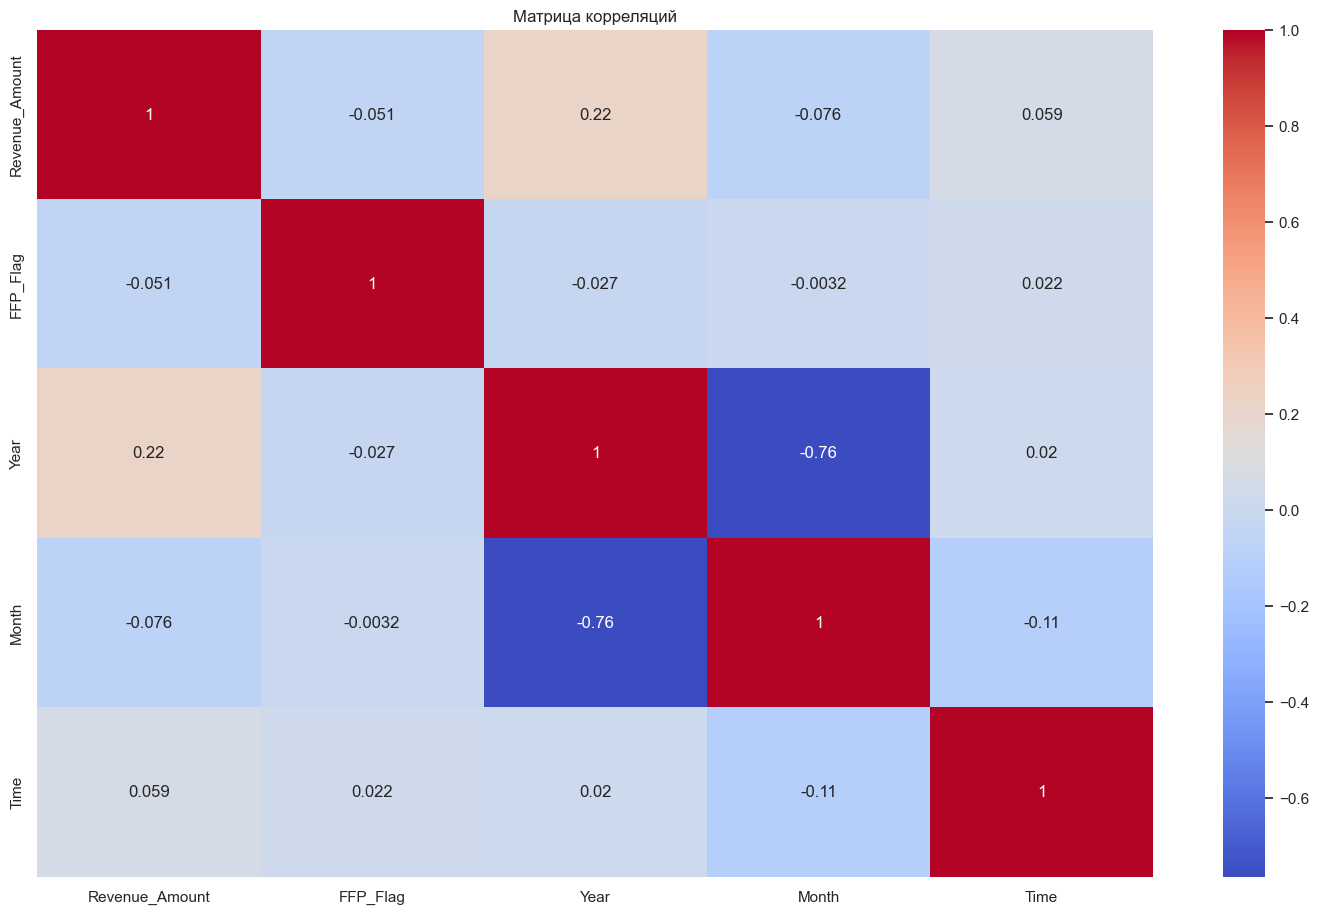

In [123]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')

### Вывод: <br>
 По матрице корреляций видно, что практически по всем критериям связь очень слабая. Для установления более явной связи нужно делить критерии по разным группам или делать иные преобразования.